# Everything Counts Assignment 1


Gustavo Araujo Costa  
LIS FT MASc 2024/2025

Access this notebook on [GitHub](https://github.com/noah-art3mis/stats-assignment-1) 

PDF generated using [nbconvert](https://nbconvert.readthedocs.io/en/latest/index.html)

## CCUS: Carbon capture, utilization and storage


Covers all large-scale CO2 capture, transport, storage, and utilisation projects commissioned or in planning worldwide.

Source: IEA (2024), [CCUS Projects Database](https://www.iea.org/data-and-statistics/data-product/ccus-projects-database)

Commentary: https://www.iea.org/commentaries/how-new-business-models-are-boosting-momentum-on-ccus

For feature description, check the README.md file.


## Data cleaning


### Import


First, we import the libraries, set style parameters for the plots, import the data, drop the columns that are unimportant and rename the remaining ones.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["figure.dpi"] = 360

In [2]:
df = pd.read_csv("data/ccus.csv")
df.head()

,Project name,ID,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,...,Ref 5,Ref 6,Ref 7,Link 1,Link 2,Link 3,Link 4,Link 5,Link 6,Link 7
0,3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...,1,France,"ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...",Capture,2019.0,NaN,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
1,3D DMX ArcelorMittal and IFPEN Dunkirk 'REUZE',751,France,"ArcelorMittal, Engie, Infinium",CCU,2022.0,2024.0,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
2,7 Blue Ammonia Facility,1055,Qatar,"QAFCO, thyssenkrupp Uhde/Consolidated Contract...",Full Chain,2022.0,2022.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
3,8Rivers H2 (8RH2) (WY),3,United States,"8Rivers, Wyoming Energy Authority",Capture,2022.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
4,Abadi CCS/CCUS,227,Indonesia,"Inpex Masela 65%, Shell (trying to find a buye...",Full chain,2018.0,NaN,2027.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Project name', 'ID', 'Country', 'Partners', 'Project type',
       'Announcement', 'FID', 'Operation', 'Suspension/decommissioning',
       'Project Status', 'Project phase', 'Announced capacity (Mt CO2/yr)',
       'Estimated capacity by IEA (Mt CO2/yr)', 'Sector', 'Fate of carbon',
       'Part of CCUS hub', 'Region', 'Ref 1', 'Ref 2', 'Ref 3', 'Ref 4',
       'Ref 5', 'Ref 6', 'Ref 7', 'Link 1', 'Link 2', 'Link 3', 'Link 4',
       'Link 5', 'Link 6', 'Link 7'],
      dtype='object')

In [4]:
df = df.drop(
    columns=[
        "Suspension/decommissioning",
        "Project phase",
        "FID",
        "ID",
        "Operation",
        "Partners",
        "Part of CCUS hub",
        "Ref 1",
        "Ref 2",
        "Ref 3",
        "Ref 4",
        "Ref 5",
        "Ref 6",
        "Ref 7",
        "Link 1",
        "Link 2",
        "Link 3",
        "Link 4",
        "Link 5",
        "Link 6",
        "Link 7",
    ]
)

df.iloc[0]

Project name                             3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...
Country                                                                             France
Project type                                                                       Capture
Announcement                                                                        2019.0
Project Status                                                                     Planned
Announced capacity (Mt CO2/yr)                                                         0.7
Estimated capacity by IEA (Mt CO2/yr)                                                  0.7
Sector                                                                      Iron and steel
Fate of carbon                                                         Unknown/unspecified
Region                                                                              Europe
Name: 0, dtype: object

In [5]:
df = df.rename(
    columns={
        "Project name": "name",
        "Country": "country",
        "Project type": "type",
        "Announcement": "year",
        "Project Status": "status",
        "Announced capacity (Mt CO2/yr)": "capacity_ann",
        "Estimated capacity by IEA (Mt CO2/yr)": "capacity_est",
        "Sector": "sector",
        "Region": "region",
        "Fate of carbon": "fate",
    }
)

# explanations for each feature are in the original excel file
df = df[
    [
        "name",
        "status",
        "region",
        "country",
        "sector",
        "type",
        "fate",
        "year",
        "capacity_ann",
        "capacity_est",
    ]
]
df.iloc[0]

name            3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...
status                                                    Planned
region                                                     Europe
country                                                    France
sector                                             Iron and steel
type                                                      Capture
fate                                          Unknown/unspecified
year                                                       2019.0
capacity_ann                                                  0.7
capacity_est                                                  0.7
Name: 0, dtype: object

### Altering columns: Project Type


In this part, we fix the 'Full Chain'/'Full chain' capitalization issue.


In [6]:
df["type"].value_counts()

type
Capture       352
Full chain    144
Storage       134
T&S            88
Transport      63
CCU            55
Full Chain      8
Name: count, dtype: int64

In [7]:
def fix_full_chain(value: str) -> str:
    if "Full chain" in value:
        return "Full Chain"
    else:
        return value


df["type"] = df["type"].apply(fix_full_chain)
df["type"].value_counts()

type
Capture       352
Full Chain    152
Storage       134
T&S            88
Transport      63
CCU            55
Name: count, dtype: int64

### Altering columns: Country and Region


While there are some `country` entries which are not standardized (`Australia-Japan`), they are not that prevalent as to affect the analysis. The same is the case for the `region` feature.


In [8]:
df["country"].value_counts()

country
United States                                      293
United Kingdom                                      92
Canada                                              74
Norway                                              34
Australia                                           33
                                                  ... 
Lithuania                                            1
New Zealand                                          1
Papua New Guinea                                     1
Lybia                                                1
Belgium, Germany, Netherlands, Switzerland, USA      1
Name: count, Length: 66, dtype: int64

In [9]:
df["region"].value_counts()

region
North America                                     368
Europe                                            310
Other Asia Pacific                                 86
Australia and New Zealand                          37
Middle East                                        21
Eurasia                                             7
Central and South America                           5
Unknown                                             4
Africa                                              4
Other Asia Pacific - Australia and New Zealand      2
Name: count, dtype: int64

### Convert appropriate columns to category dtype


In this section, we convert some columns to the category dtype. These columns were selected by going through each of the columns with the `value_counts()` method to check if they had categorical data. Although not particularly relevant in this case, we also see a ~3x reduction in memory usage.


In [10]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          844 non-null    object 
 1   status        844 non-null    object 
 2   region        844 non-null    object 
 3   country       844 non-null    object 
 4   sector        844 non-null    object 
 5   type          844 non-null    object 
 6   fate          844 non-null    object 
 7   year          824 non-null    float64
 8   capacity_ann  614 non-null    object 
 9   capacity_est  645 non-null    float64
dtypes: float64(2), object(8)
memory usage: 468.1 KB


In [11]:
category_cols = [
    "country",
    "type",
    "status",
    "sector",
    "fate",
    "region",
]

df[category_cols] = df[category_cols].astype("category")

In [12]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          844 non-null    object  
 1   status        844 non-null    category
 2   region        844 non-null    category
 3   country       844 non-null    category
 4   sector        844 non-null    category
 5   type          844 non-null    category
 6   fate          844 non-null    category
 7   year          824 non-null    float64 
 8   capacity_ann  614 non-null    object  
 9   capacity_est  645 non-null    float64 
dtypes: category(6), float64(2), object(2)
memory usage: 148.4 KB


### Altering columns: capacity_ann


`capacity_ann` it the only column which needs to be modified. This is necessary because there are 106 entries which have ranges instead of numbers. This makes it so the dtype of the column is wrong, which interrupts further analysis.


First, we drop the entries with missing data announcement data, which are about `27%` of the data. While this might introduce some bias regarding the availability of that data, we judge it to be necessary. Dropping these entries conveniently removes the 23% of projects which have no estimated capacity as well.

We save this as a new dataframe so the whole data is still available for categorical feature description, but we have the cleaned data for numerical analysis.


In [13]:
missing_announcement = df["capacity_ann"].isna().sum() / df.shape[0] * 100
print(f"Around {missing_announcement:.2f}% of the data has no announced capacity")

Around 27.25% of the data has no announced capacity


In [14]:
missing_estimated = df["capacity_est"].isna().sum() / df.shape[0] * 100
print(f"Around {missing_estimated:.2f}% of the data has no estimated capacity")

Around 23.58% of the data has no estimated capacity


In [15]:
df_77 = df.dropna(subset=["capacity_ann"])

To substitute a range for its mean, we should have a reasonable argument that the mean is representative of the range. We do this by checking the distribution of the ranges. We will use this data shortly.


In [16]:
def range_size(value: str) -> float:
    if "-" not in value:
        return float(value)

    arr = value.split("-")
    a = float(arr[0].strip())
    b = float(arr[1].strip())
    return b - a


ranges = df_77["capacity_ann"].apply(range_size)

Here we find two outliers (`250` and `120`), which are dropped from the descriptive statistics. This also sets indices `635` and `676` as noteworthy, which will be important later.


In [17]:
ranges.sort_values(ascending=False).head()

635    250.0
676    120.0
794     30.0
563     30.0
773     30.0
Name: capacity_ann, dtype: float64

In [18]:
ranges.drop([635, 676]).describe()

count    612.000000
mean       2.479724
std        4.076815
min       -5.000000
25%        0.300000
50%        1.000000
75%        2.962500
max       30.000000
Name: capacity_ann, dtype: float64

This code detects if the entry is a range, splits it, converts it into a number, gets the mean of the range, and returns it.


In [19]:
def range_cleanup(value: str) -> float:
    if "-" not in value:
        return float(value)

    arr = value.split("-")
    a = float(arr[0].strip())
    b = float(arr[1].strip())
    return (a + b) / 2


df_77["capacity_ann"] = df_77["capacity_ann"].apply(range_cleanup)
df_77["capacity_ann"].sample(5)

/tmp/ipykernel_5846/1303587104.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_77["capacity_ann"] = df_77["capacity_ann"].apply(range_cleanup)


285     0.8
223     1.4
32     14.0
2       1.5
489     1.7
Name: capacity_ann, dtype: float64

In [20]:
df_77["capacity_ann"].drop([635, 676]).describe()

count    612.000000
mean       2.796284
std        4.425264
min        0.000000
25%        0.400000
50%        1.200000
75%        3.000000
max       30.000000
Name: capacity_ann, dtype: float64

The resulting data has mean `2.8` (std `4.4`).

The ranges which were altered have mean `2.4` (std `4`).

Since the mean of the ranges is inside the standard deviation of the data, we assume the substituting the range for the mean does not distort the data. While this is debatable, this is also not the point of this assignment, so let's move on.

The feature `capacity_ann` is now tractable for numerical analysis.


### New feature: capacity_diff


This also makes it possible for us to add a new feature: the difference between the announced capacity and the estimated capacity.


In [21]:
df_77["capacity_diff"] = df_77["capacity_ann"] - df_77["capacity_est"]

df_77["capacity_diff"].describe()

/tmp/ipykernel_5846/4224938376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_77["capacity_diff"] = df_77["capacity_ann"] - df_77["capacity_est"]


count    614.000000
mean      -0.068950
std        0.749446
min      -10.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: capacity_diff, dtype: float64

Given that the minimum value is `-10`, the maximum is `5`, the mean is `-0.06` and the standard deviation `0.7`, we can assume that the difference between estimated and announced capacity is not relevant in most cases.


This is all saved in the `df_77` DataFrame to be used later.


### Missing data


These are the missing values by column:


In [22]:
df.isna().sum().sort_values(ascending=False)

capacity_ann    230
capacity_est    199
year             20
name              0
status            0
region            0
type              0
sector            0
country           0
fate              0
dtype: int64

Since it is only about 2% of the original sample, entries without an announcement year entry are dropped.


In [23]:
df = df.dropna(subset=["year"])

In this way, all missing values are removed from the sample (besides the missing capacity data, which we already talked about)


## Descriptive Statistics


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 842
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          824 non-null    object  
 1   status        824 non-null    category
 2   region        824 non-null    category
 3   country       824 non-null    category
 4   sector        824 non-null    category
 5   type          824 non-null    category
 6   fate          824 non-null    category
 7   year          824 non-null    float64 
 8   capacity_ann  597 non-null    object  
 9   capacity_est  628 non-null    float64 
dtypes: category(6), float64(2), object(2)
memory usage: 41.2+ KB


### Categorical variables


Here, we do some descriptive statistics of the categorical features:

-   Region
-   Country
-   Fate of carbon
-   Sector
-   type
-   Project status


Text(0.5, 1.0, 'CCUS Projects by region')

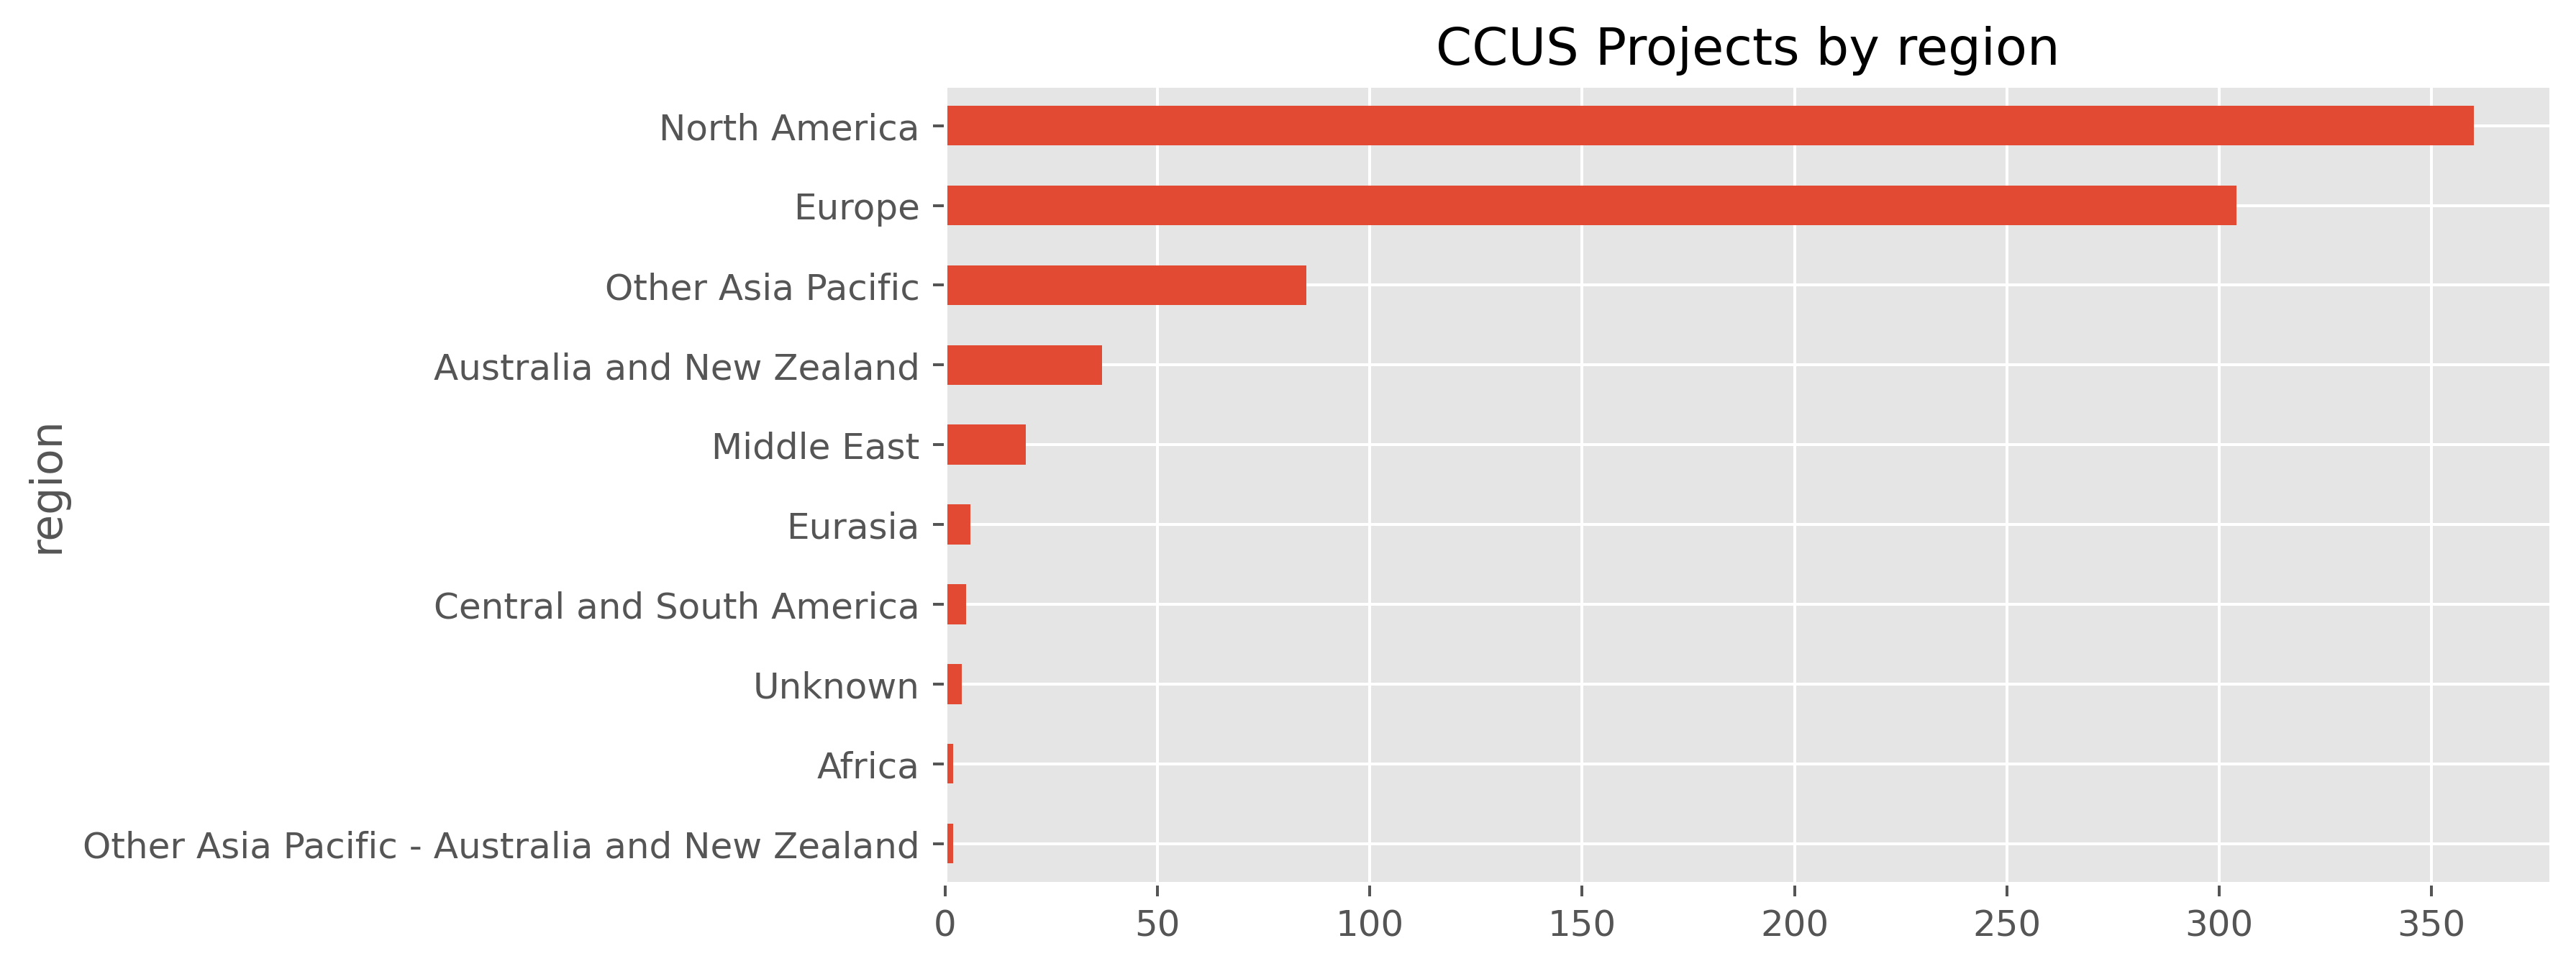

In [25]:
df["region"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("CCUS Projects by region")

In [26]:
df_rows_count = df.shape[0]
europe_counts = (df["region"] == "Europe").sum()
na_counts = (df["region"] == "North America").sum()
region_percentage = (europe_counts + na_counts) / df_rows_count
print(
    f"Europe and North America account for {region_percentage * 100:.2f}% of total entries"
)

Europe and North America account for 80.58% of total entries


Text(0.5, 1.0, 'CCUS projects by country (first 20)')

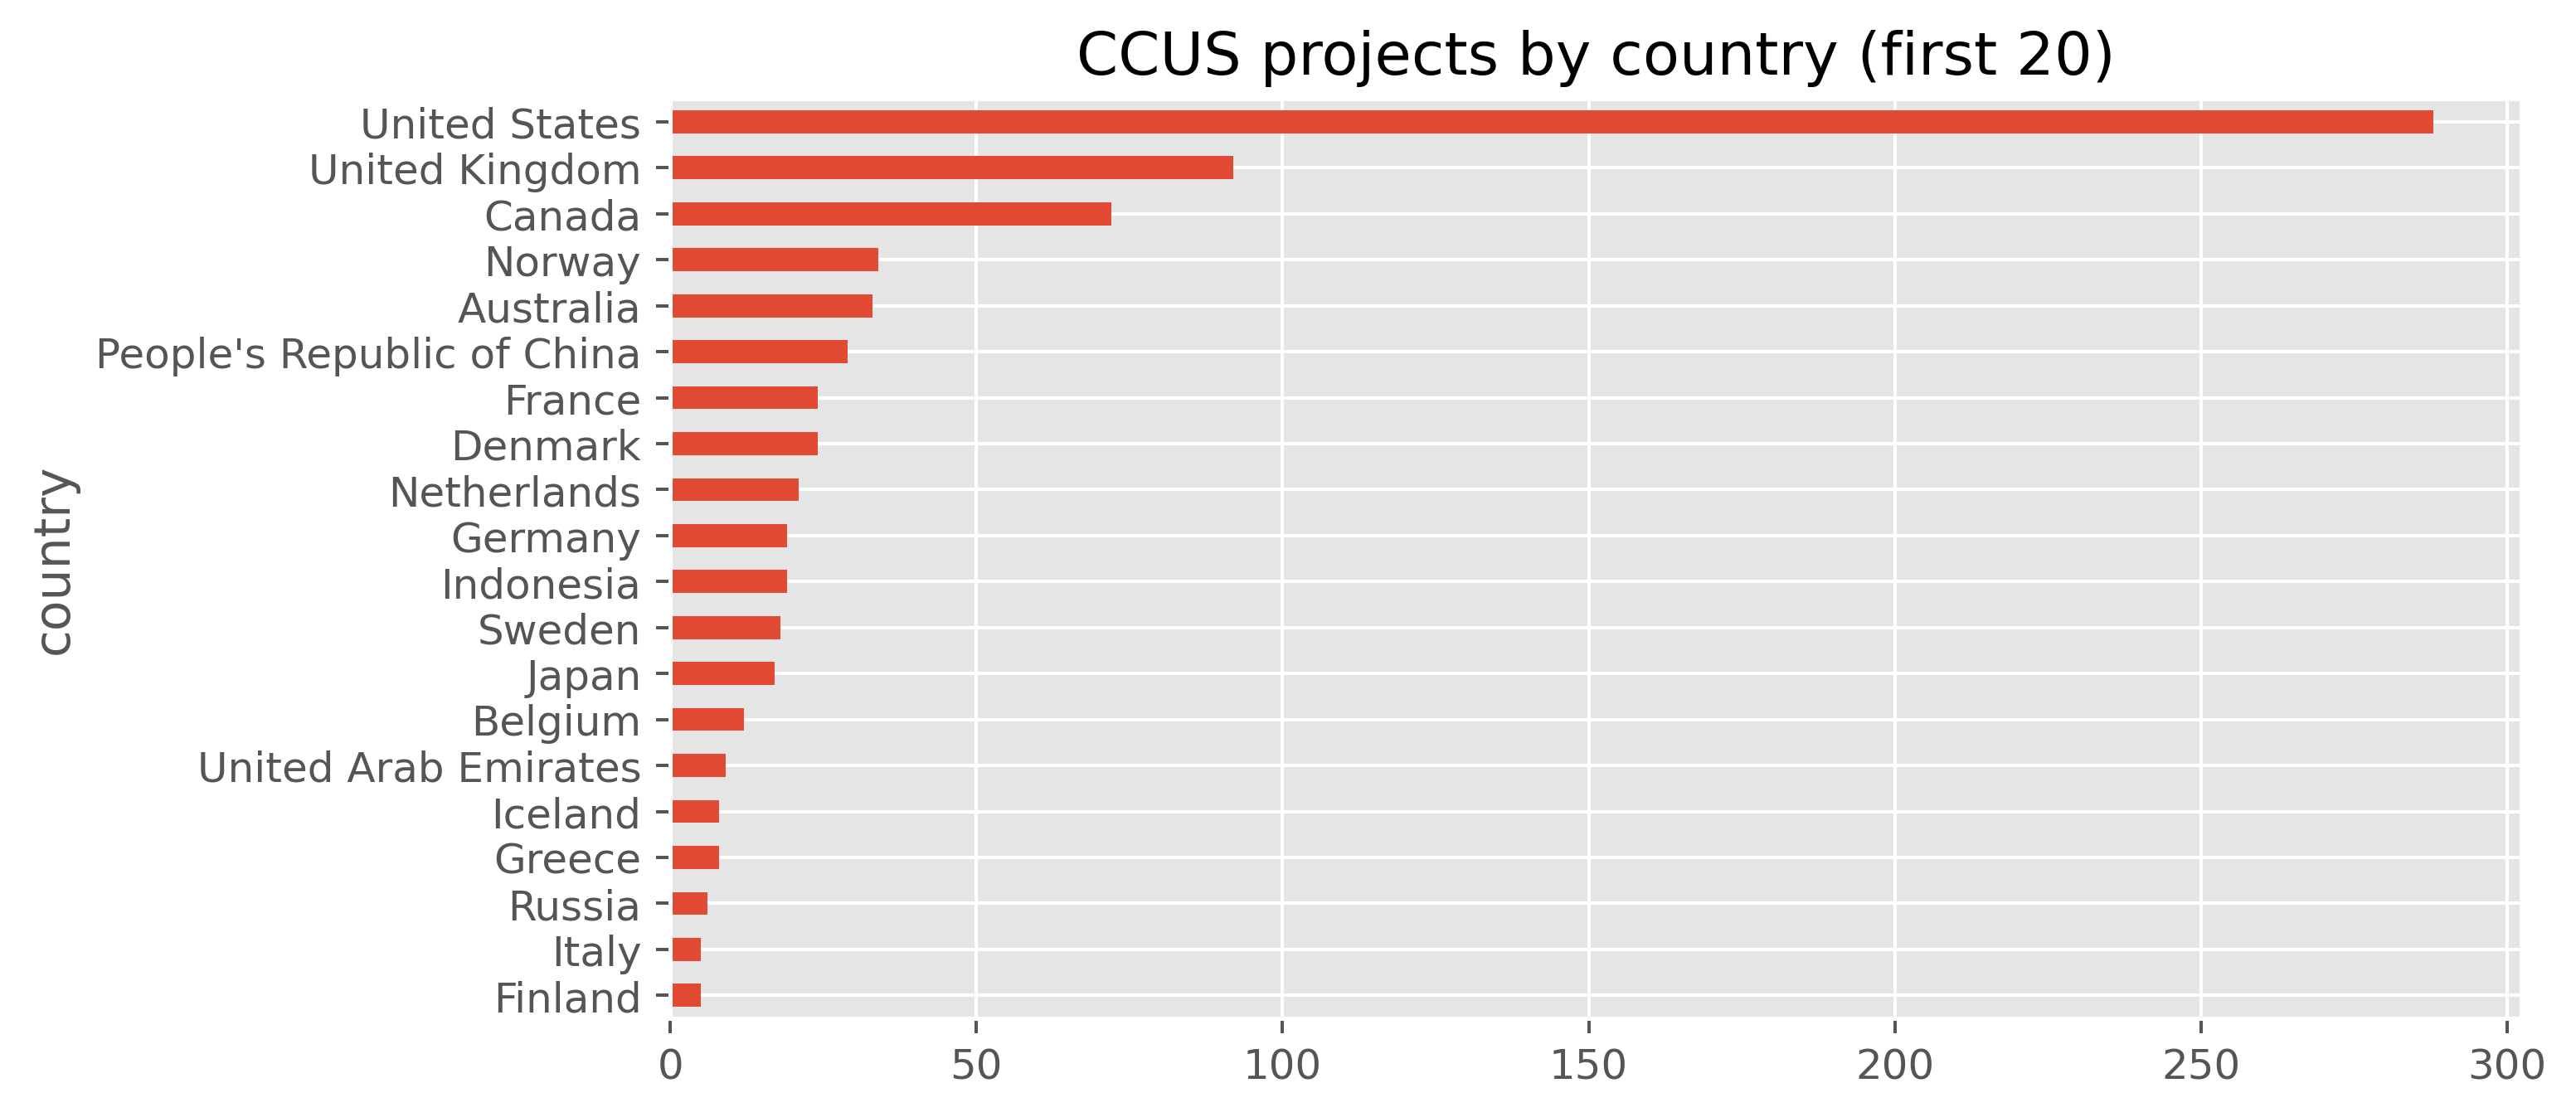

In [27]:
df["country"].value_counts().sort_values(ascending=True).tail(20).plot.barh()
plt.title("CCUS projects by country (first 20)")

In [28]:
df_rows_count = df.shape[0]
us_counts = (df["country"] == "United States").sum()
country_percentage = us_counts / df_rows_count
print(f"US accounts for {country_percentage * 100:.2f}% of total entries")

US accounts for 34.95% of total entries


Text(0.5, 1.0, 'CCUS projects by type')

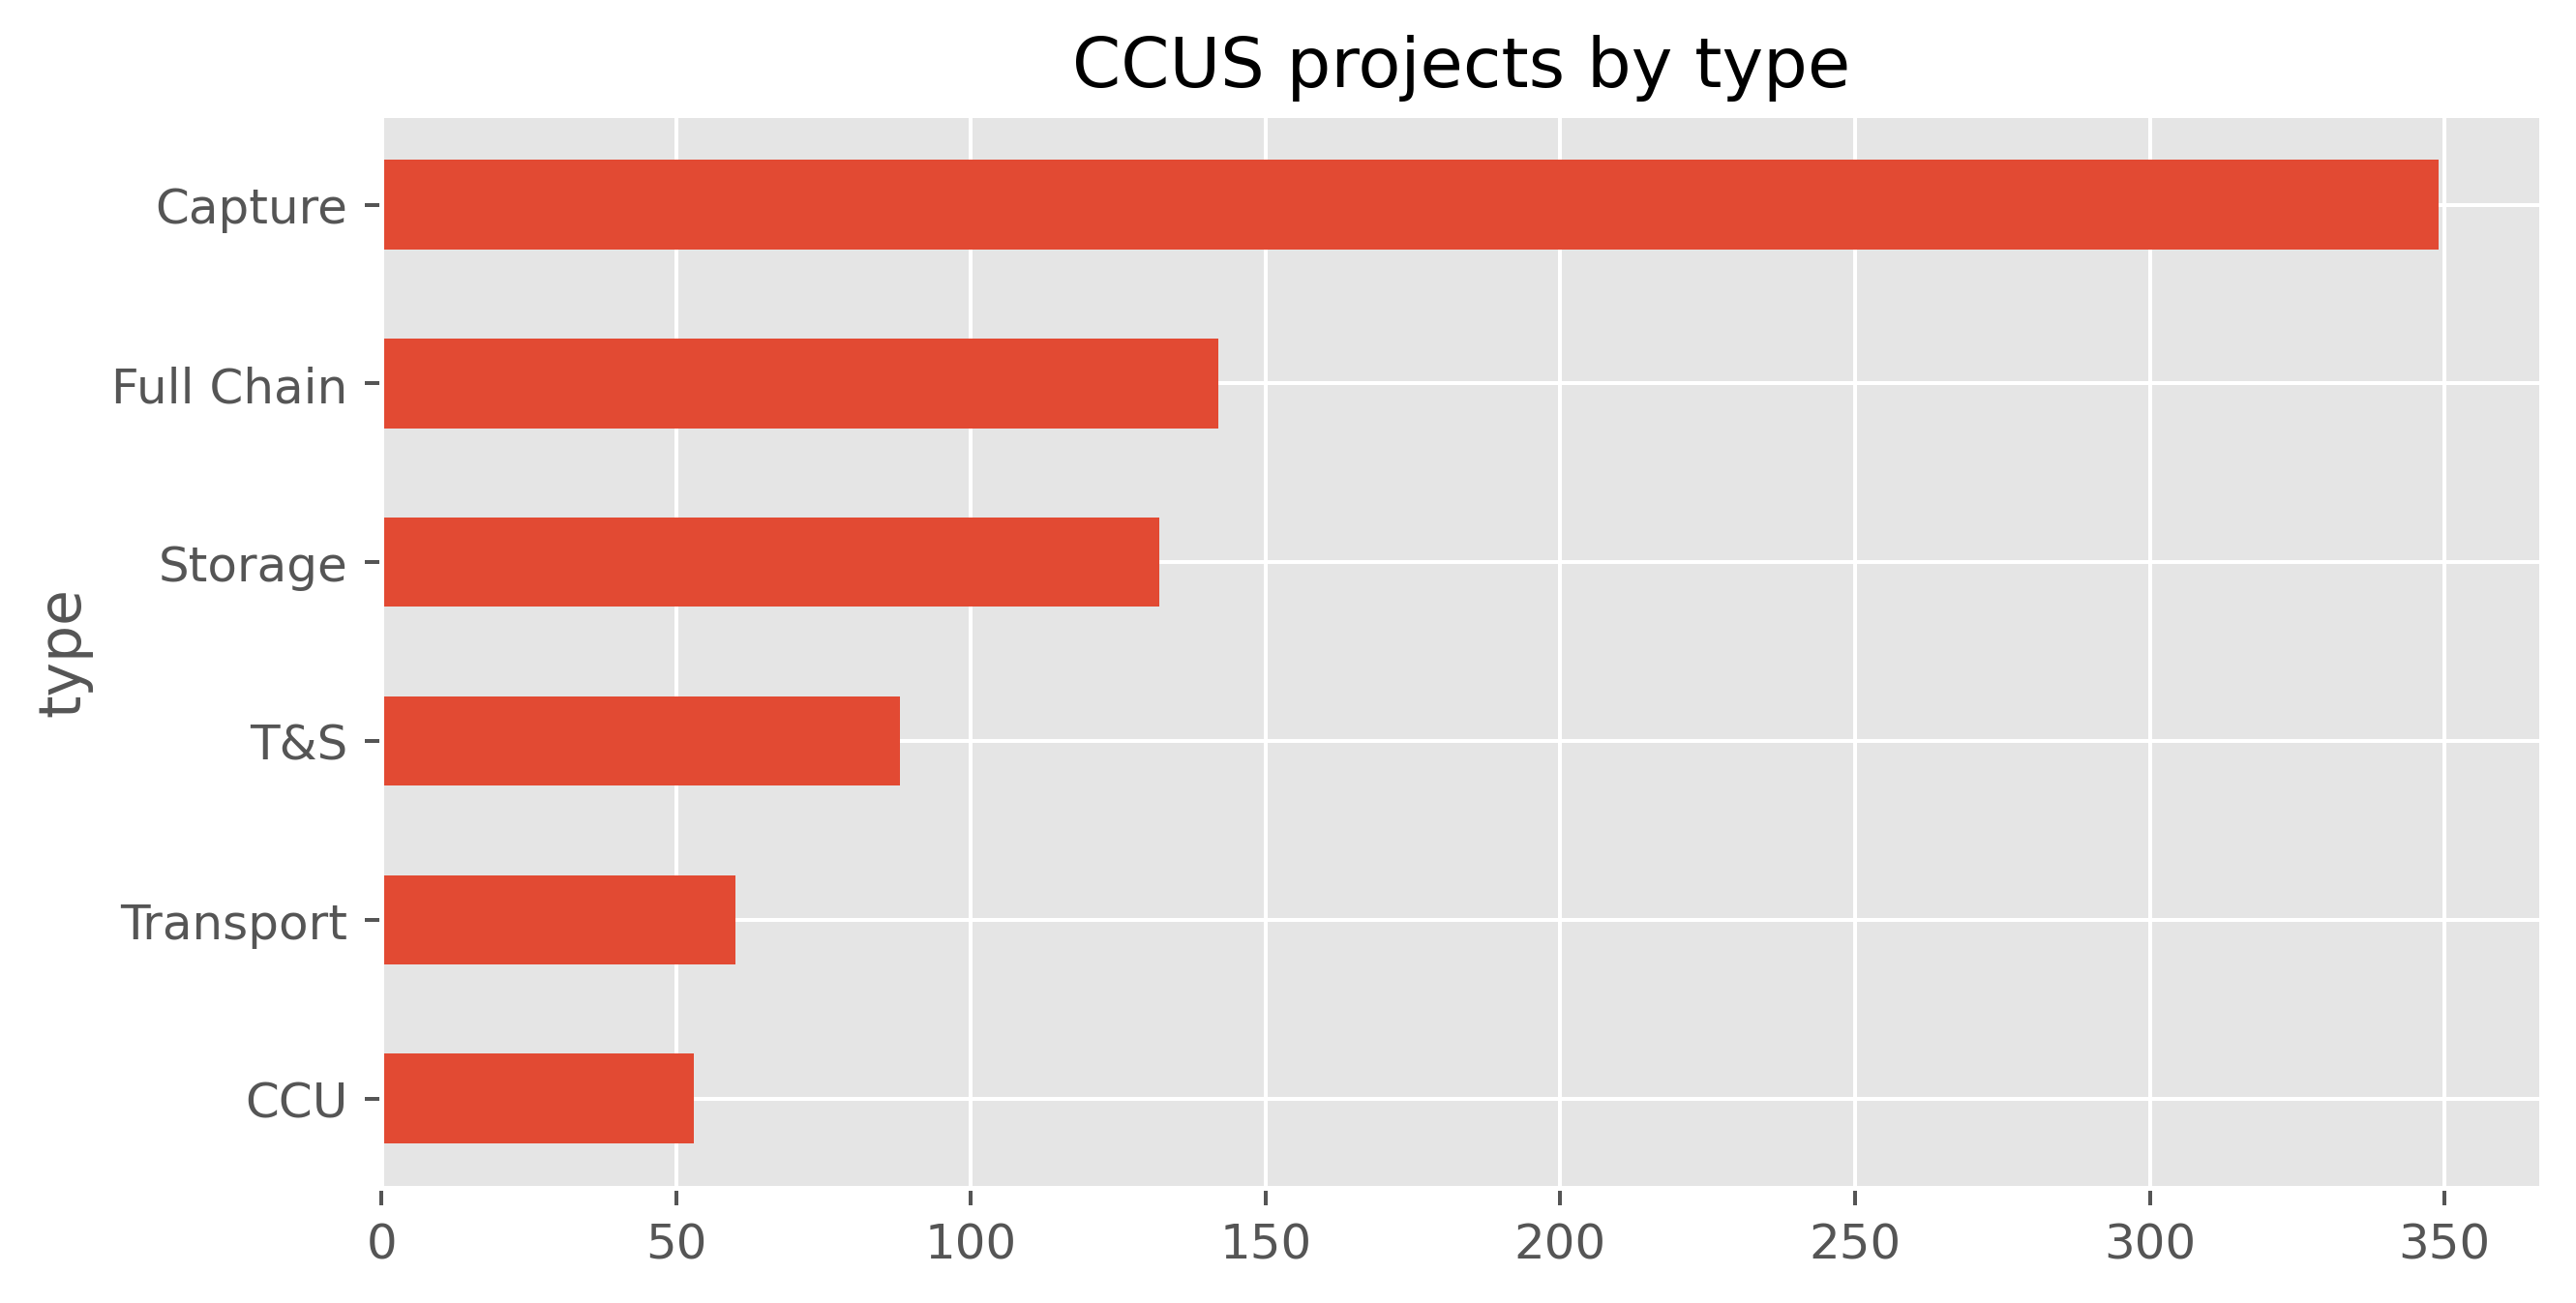

In [29]:
df["type"].value_counts().sort_values().plot.barh()
plt.title("CCUS projects by type")

In [30]:
df_rows_count = df.shape[0]
capture_counts = ((df["type"] == "Capture") | (df["type"] == "Full Chain")).sum()
type_percentage = capture_counts / df_rows_count
print(f"Capture projects account for {type_percentage * 100:.2f}% of total entries")

Capture projects account for 59.59% of total entries


In [31]:
df_rows_count = df.shape[0]
storage_counts = (
    (df["type"] == "Storage") | (df["type"] == "Full Chain") | (df["type"] == "T&S")
).sum()
type_percentage = storage_counts / df_rows_count
print(f"Storage projects account for {type_percentage * 100:.2f}% of total entries")

Storage projects account for 43.93% of total entries


Text(0.5, 1.0, 'CCUS Projects by Status')

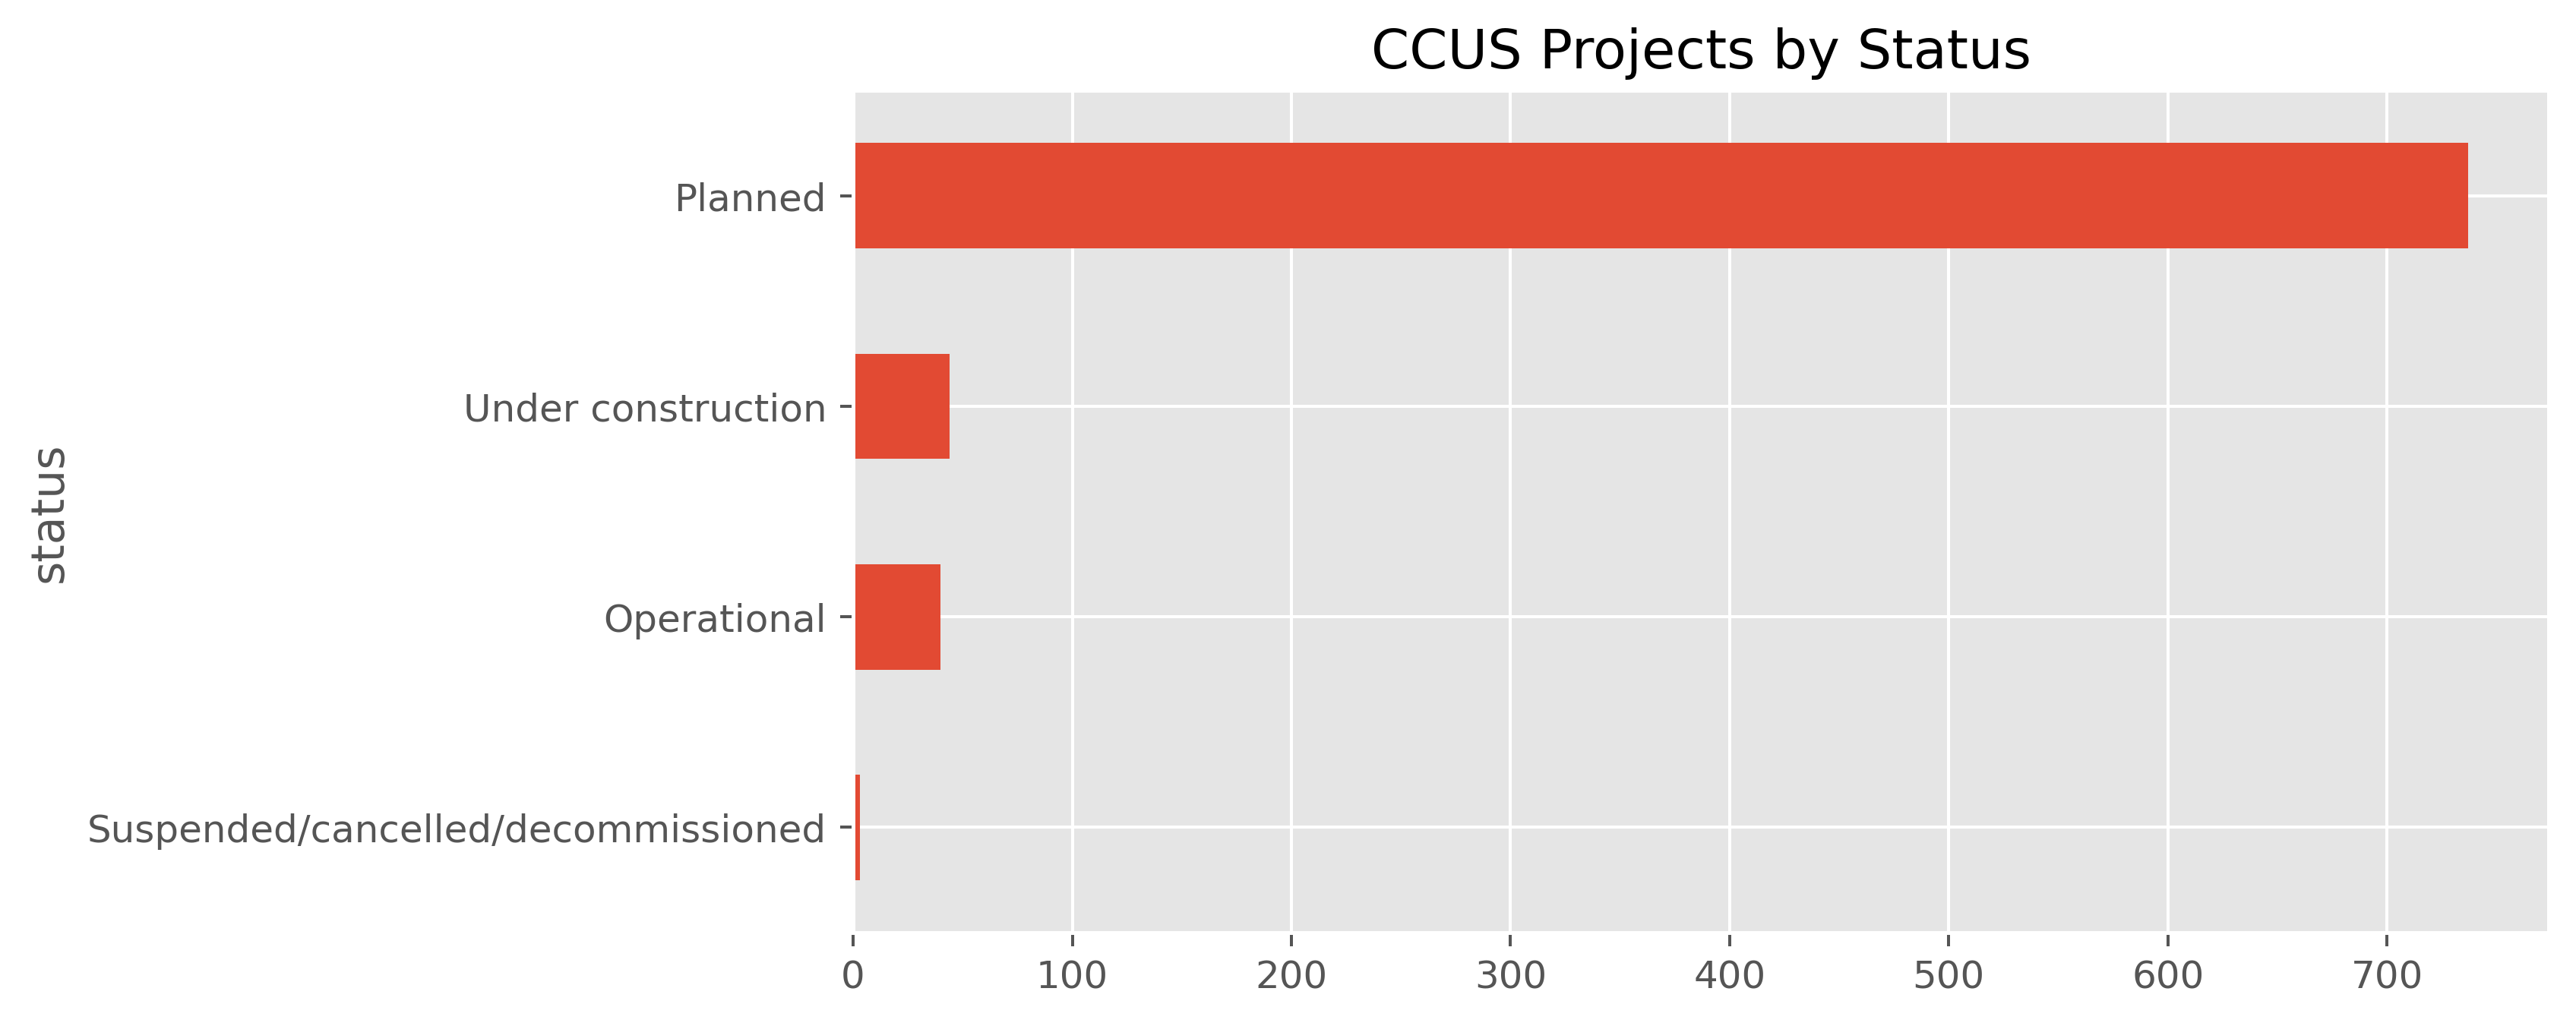

In [32]:
df["status"].value_counts().sort_values().plot.barh()
plt.title("CCUS Projects by Status")

In [33]:
df_rows_count = df.shape[0]
planned_counts = (df["status"] == "Planned").sum()
status_percentage = planned_counts / df_rows_count
print(f"Planned status accounts for {status_percentage * 100:.2f}% of total entries")

Planned status accounts for 89.44% of total entries


In [34]:
df_rows_count = df.shape[0]
op_counts = (df["status"] == "Operational").sum()
status_percentage = op_counts / df_rows_count
print(
    f"Operational status accounts for {status_percentage * 100:.2f}% of total entries"
)

Operational status accounts for 4.85% of total entries


Text(0.5, 1.0, 'CCUS Projects by sector')

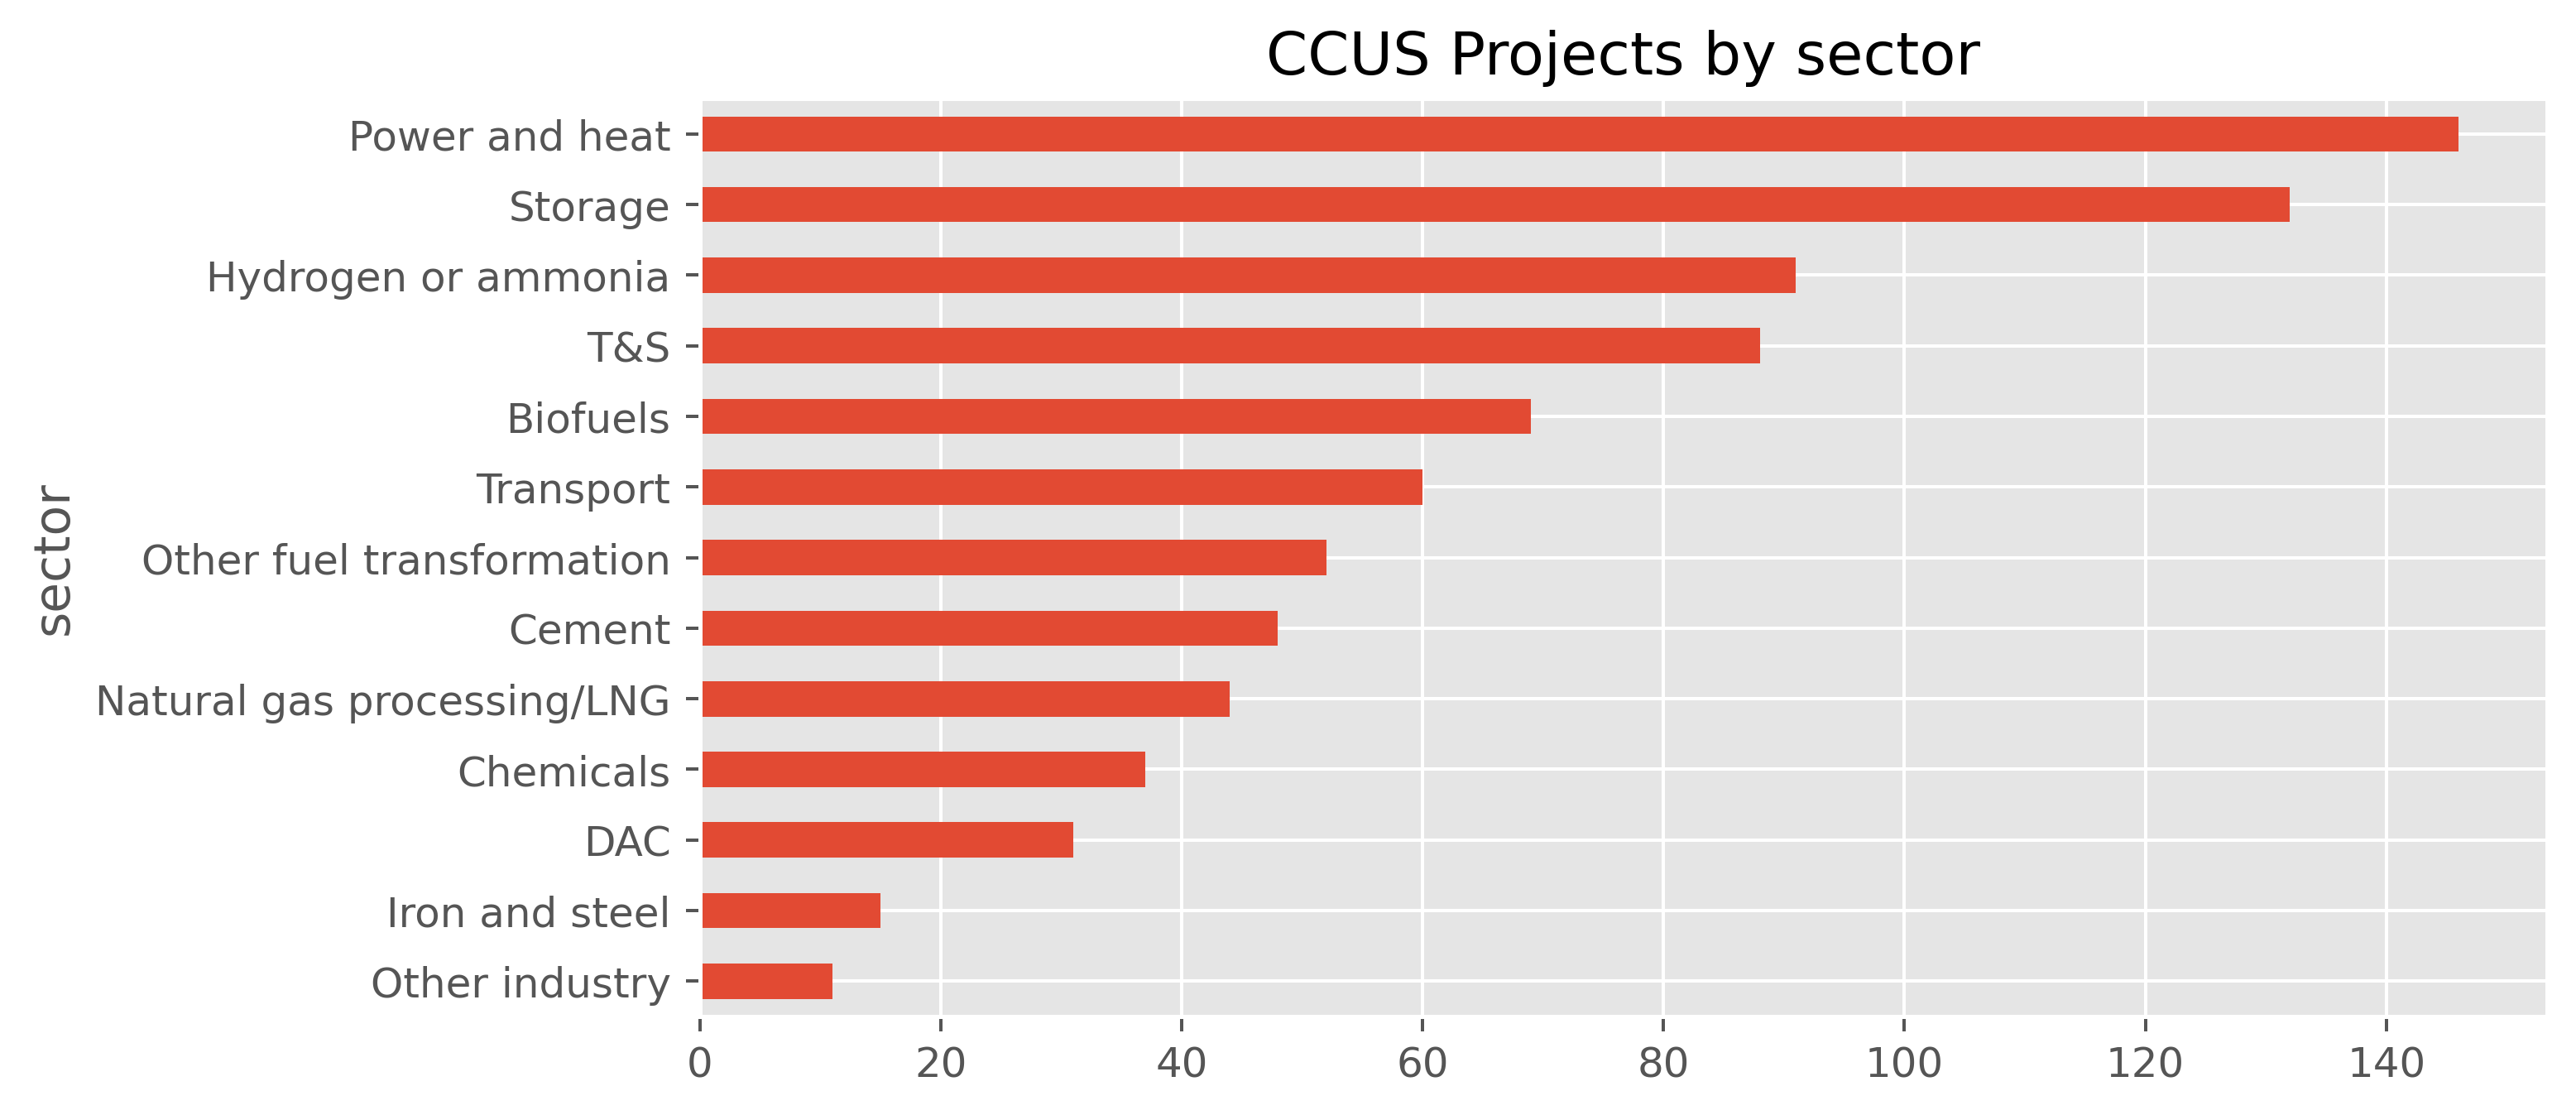

In [35]:
df["sector"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("CCUS Projects by sector")

Text(0.5, 1.0, 'CCUS Projects by Status')

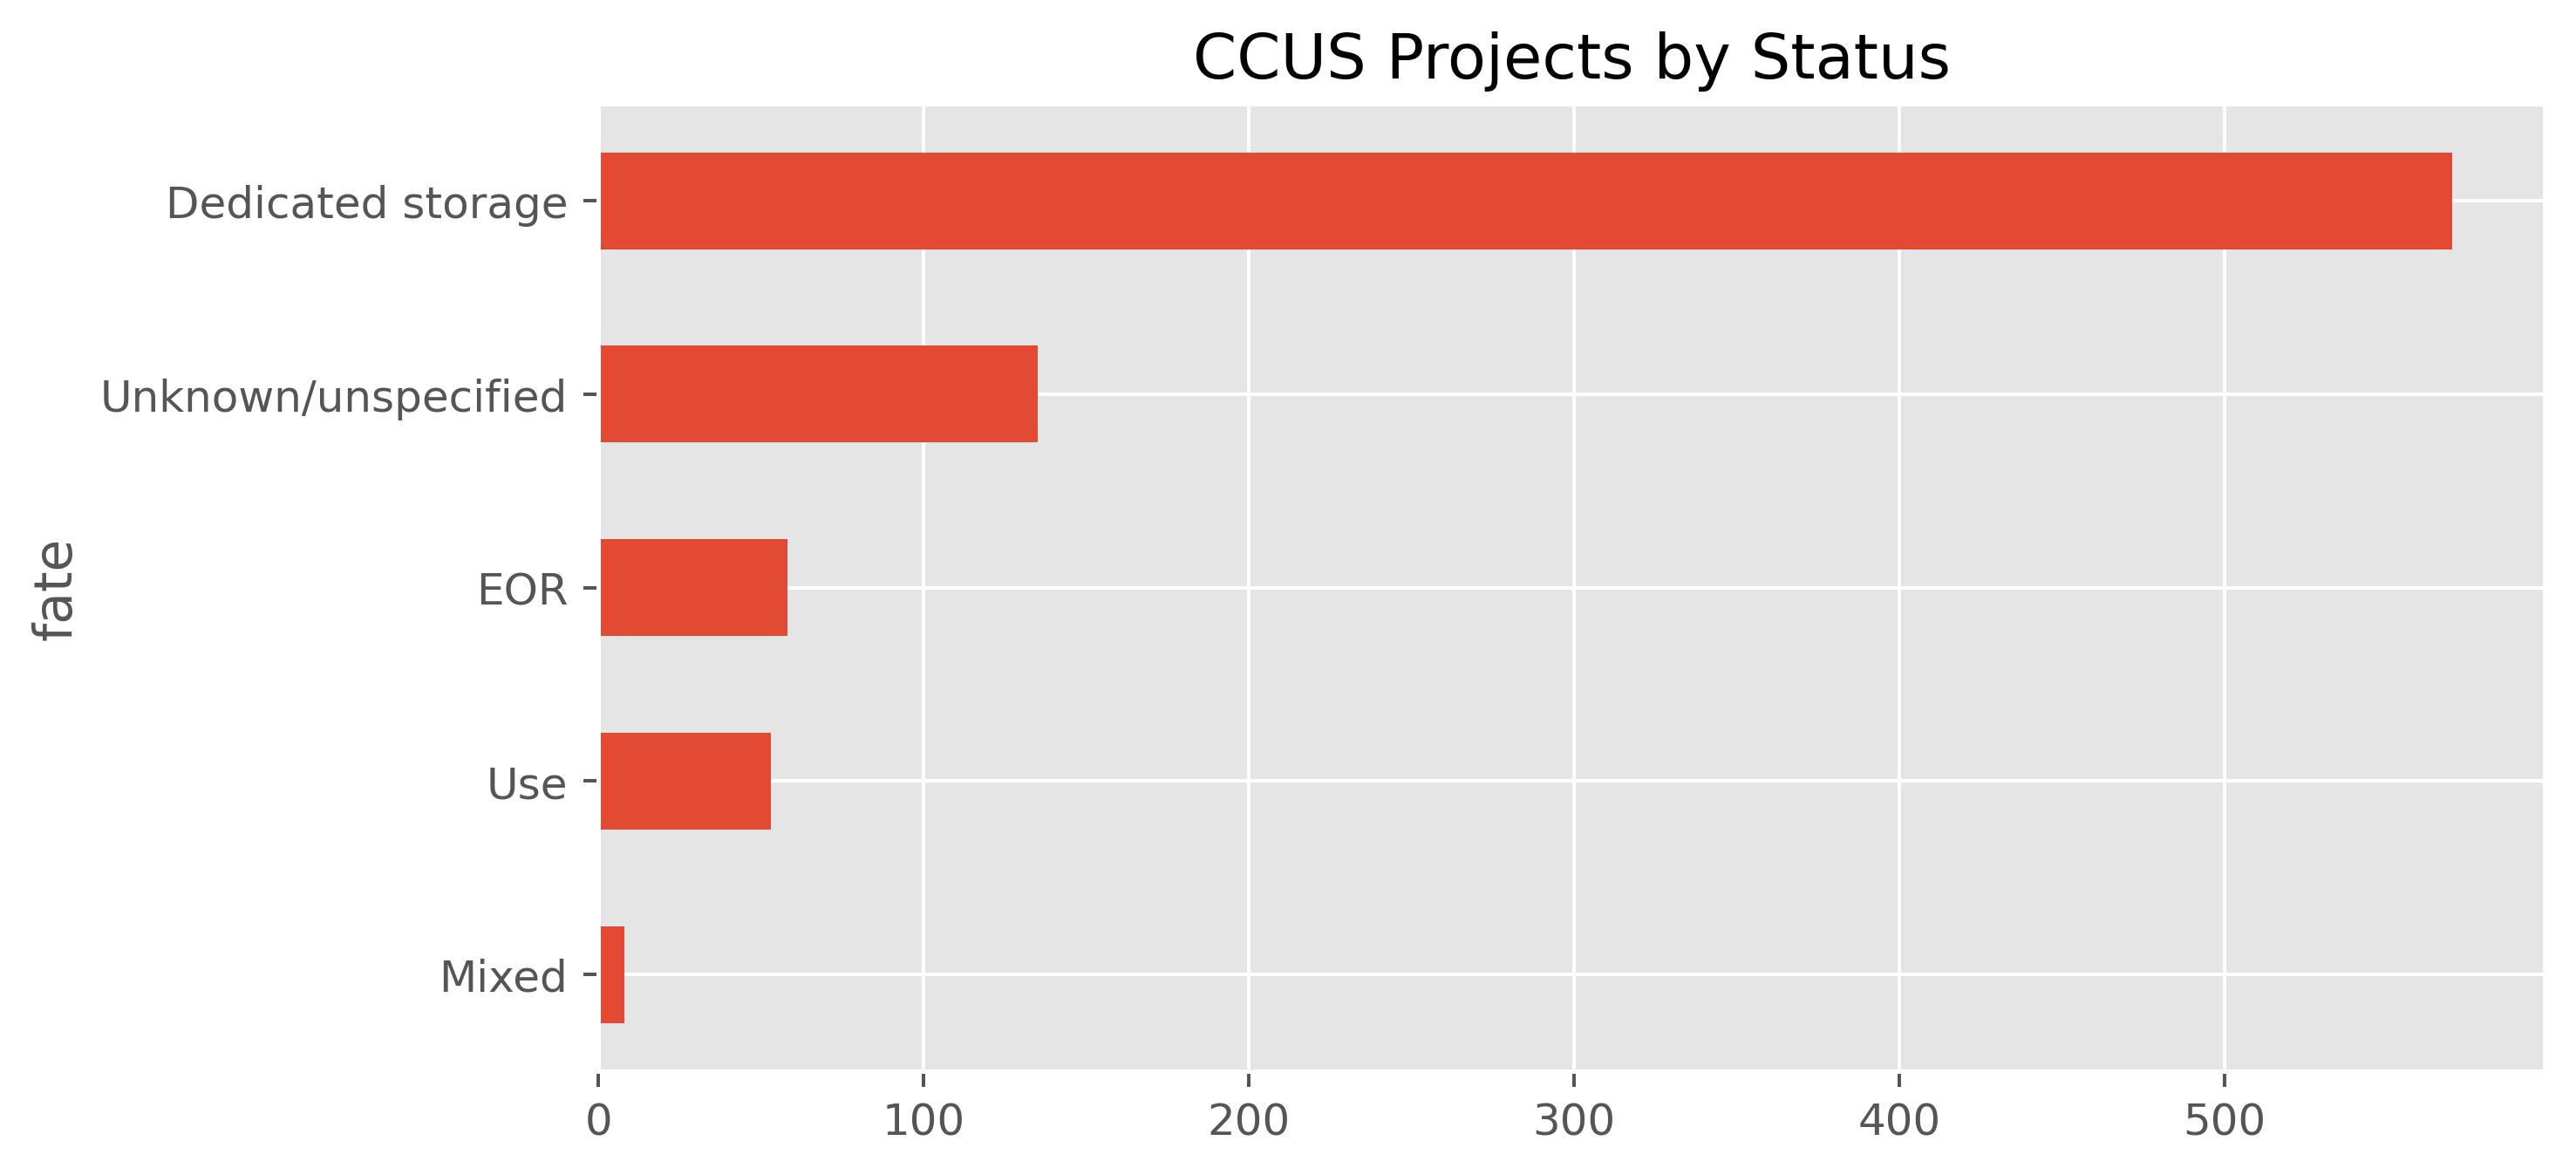

In [36]:
df["fate"].value_counts().sort_values().plot.barh()
plt.title("CCUS Projects by Status")

In [37]:
df_rows_count = df.shape[0]
fate_counts = (df["fate"] == "Dedicated storage").sum()
status_percentage = fate_counts / df_rows_count
print(f"Storage accounts for {status_percentage * 100:.2f}% of total entries")

Storage accounts for 69.17% of total entries


### Insights

-   Projects are mainly based in the United States (34.95%)
-   If we consider Europe and North America, that number rises to **80.85%**
-   Most projects (**86.26%**) are in the planning stage.
-   While most projects are concerned with capture (59.59%), there is some diversity there.
-   The fate of carbon of 69.17% of projects is storage, but only 43% of projects plan on storing the carbon.

With this, we have a median picture of a CCUS project: a company in Europe or the US that has plans to capture carbon for them or somebody else to store it. This makes sense considering the US's [plan](https://www.whitehouse.gov/cleanenergy/inflation-reduction-act-guidebook/) to become an environmental innovation center. While China is investing in electric vehicles, it does not seem to be investing in CCUS.

There might be a pentiful supply of captured CO2 looking for storage or utilization, which is a potential niche in the market to be explored. This is, however, predictive, since most of the projects are still in the planning stage.


### Numerical features


Here, we do some descriptive statistics of the numerical features:

-   `year`: year of project announcement
-   `capacity_ann`: Announced capacity (Mt CO2/yr)
-   `capacity_est`: Estimated capacity by IEA (Mt CO2/yr)
-   `capacity_diff`: difference between announced and estimated capacity

We use the df_77 for this.


Text(0.5, 1.0, 'CCUS project announcements by year')

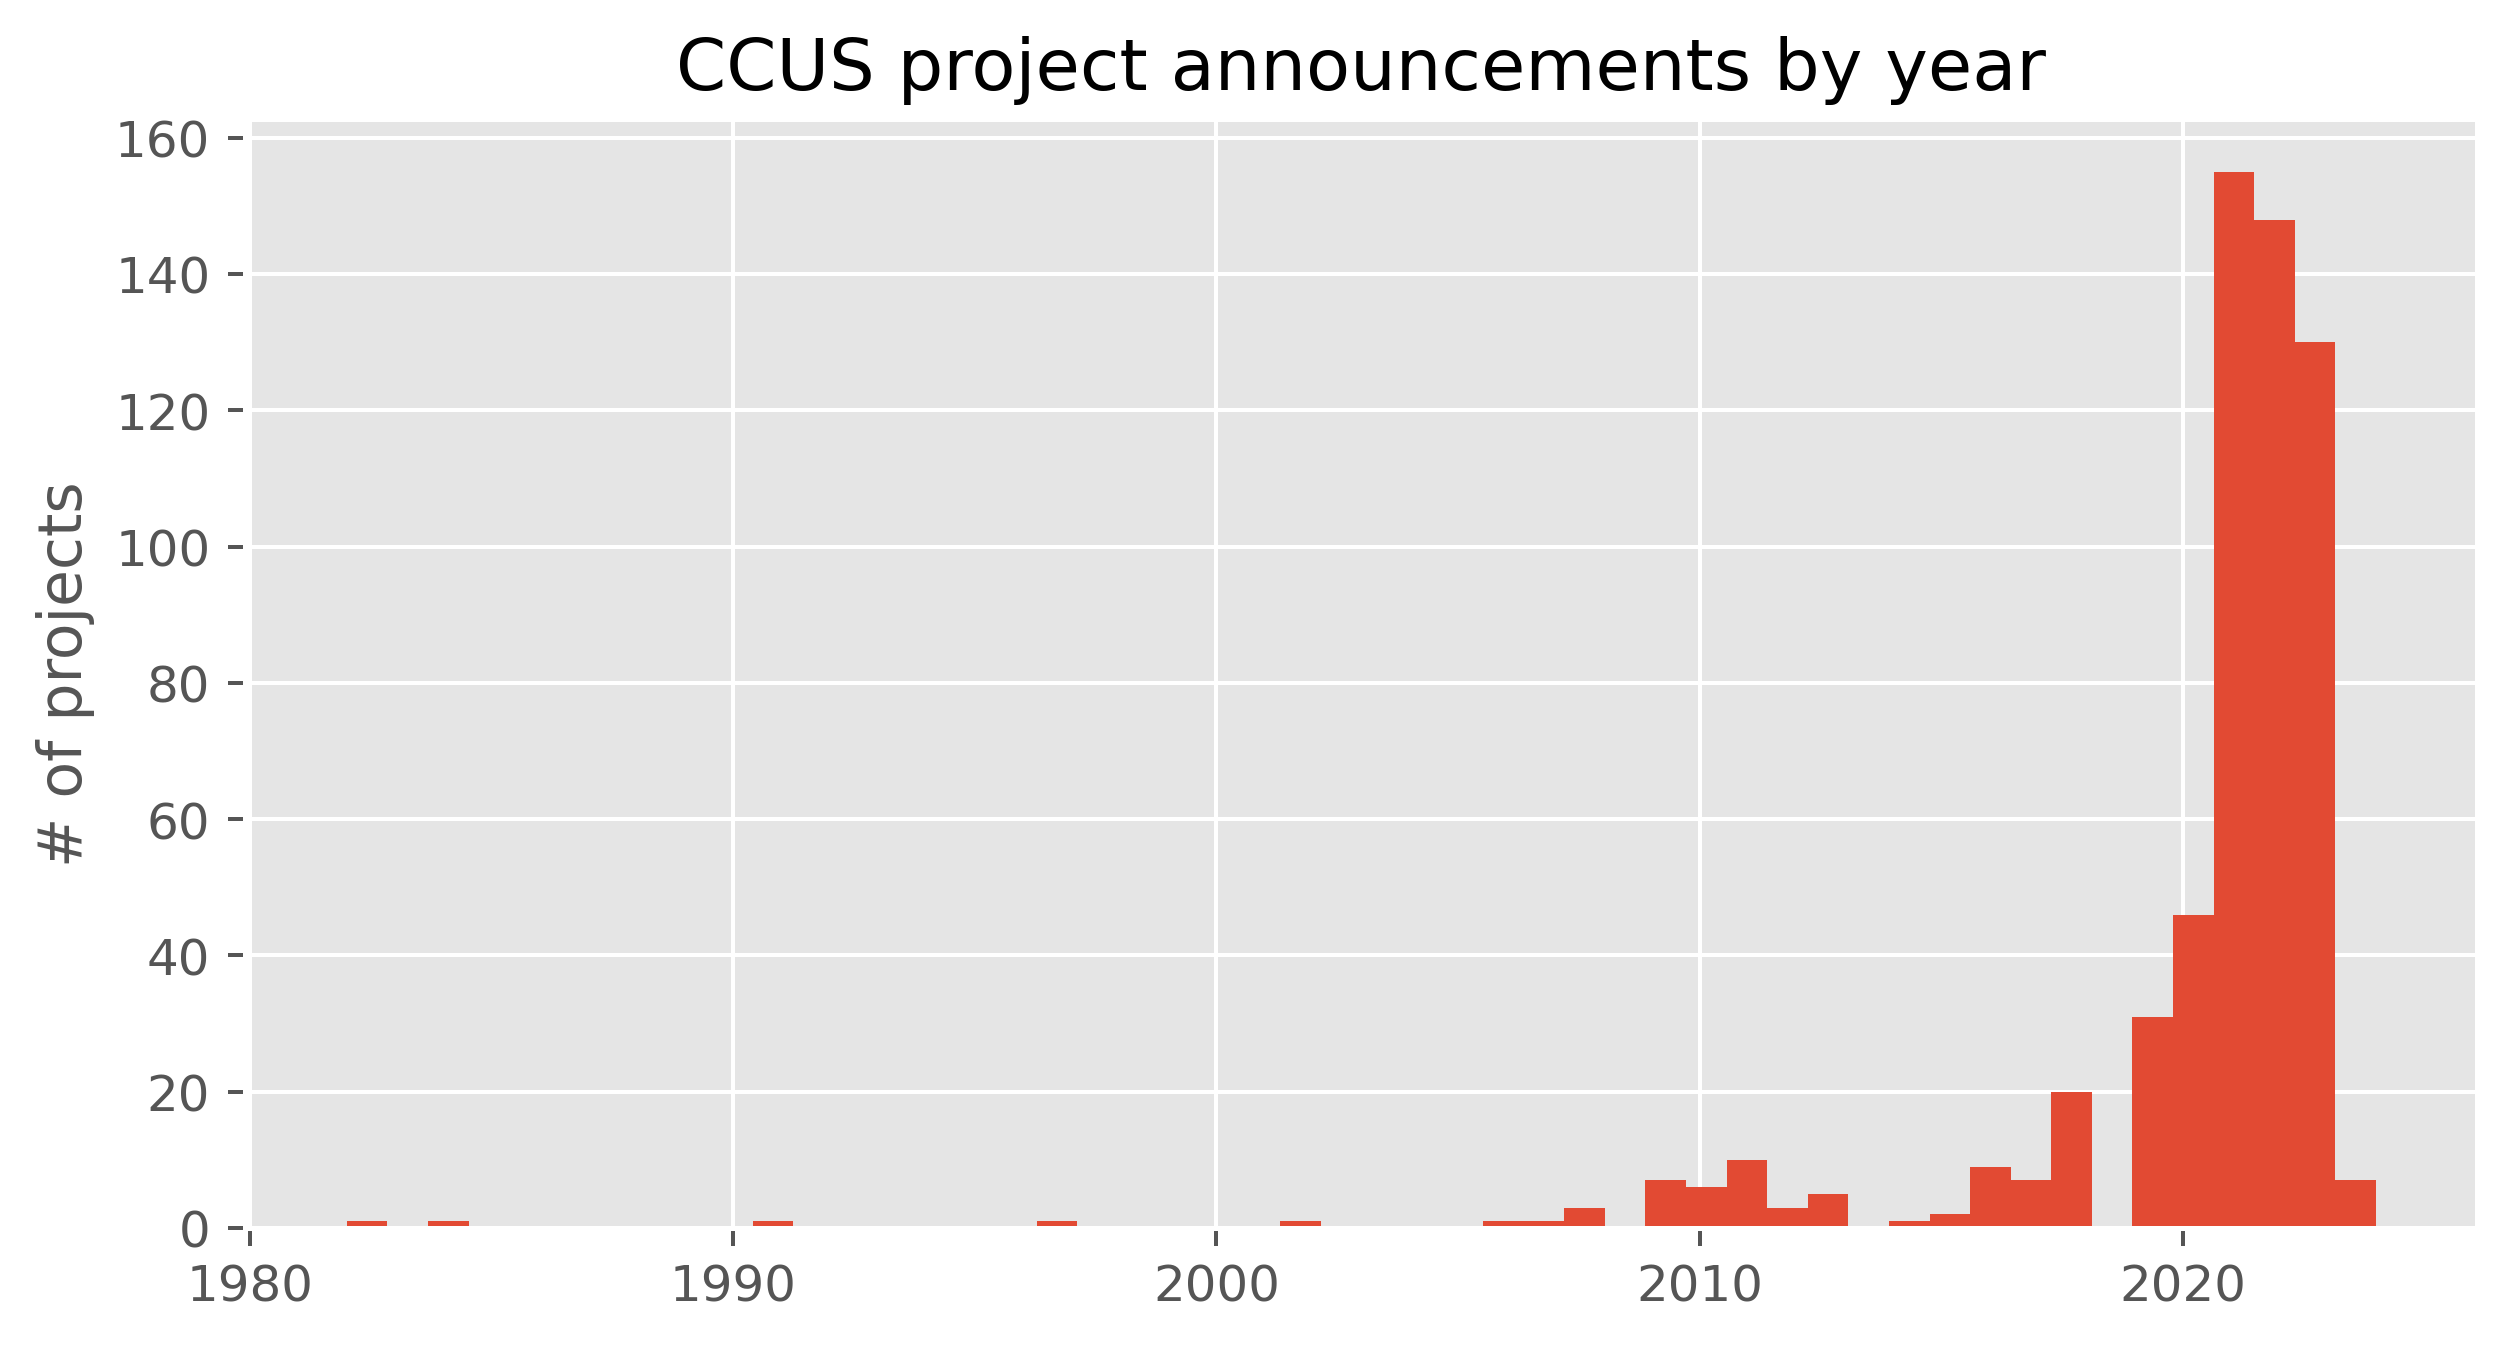

In [38]:
df_77["year"].hist(bins=50)
plt.ylabel("# of projects")
plt.title("CCUS project announcements by year")

In [39]:
year_p = (155 + 148 + 130) / df_77.shape[0]
print(f"{year_p * 100:.2f}% of projects announced in 2021-2023")

70.52% of projects announced in 2021-2023


Text(0.5, 1.0, 'CCUS project capacity (no outliers)')

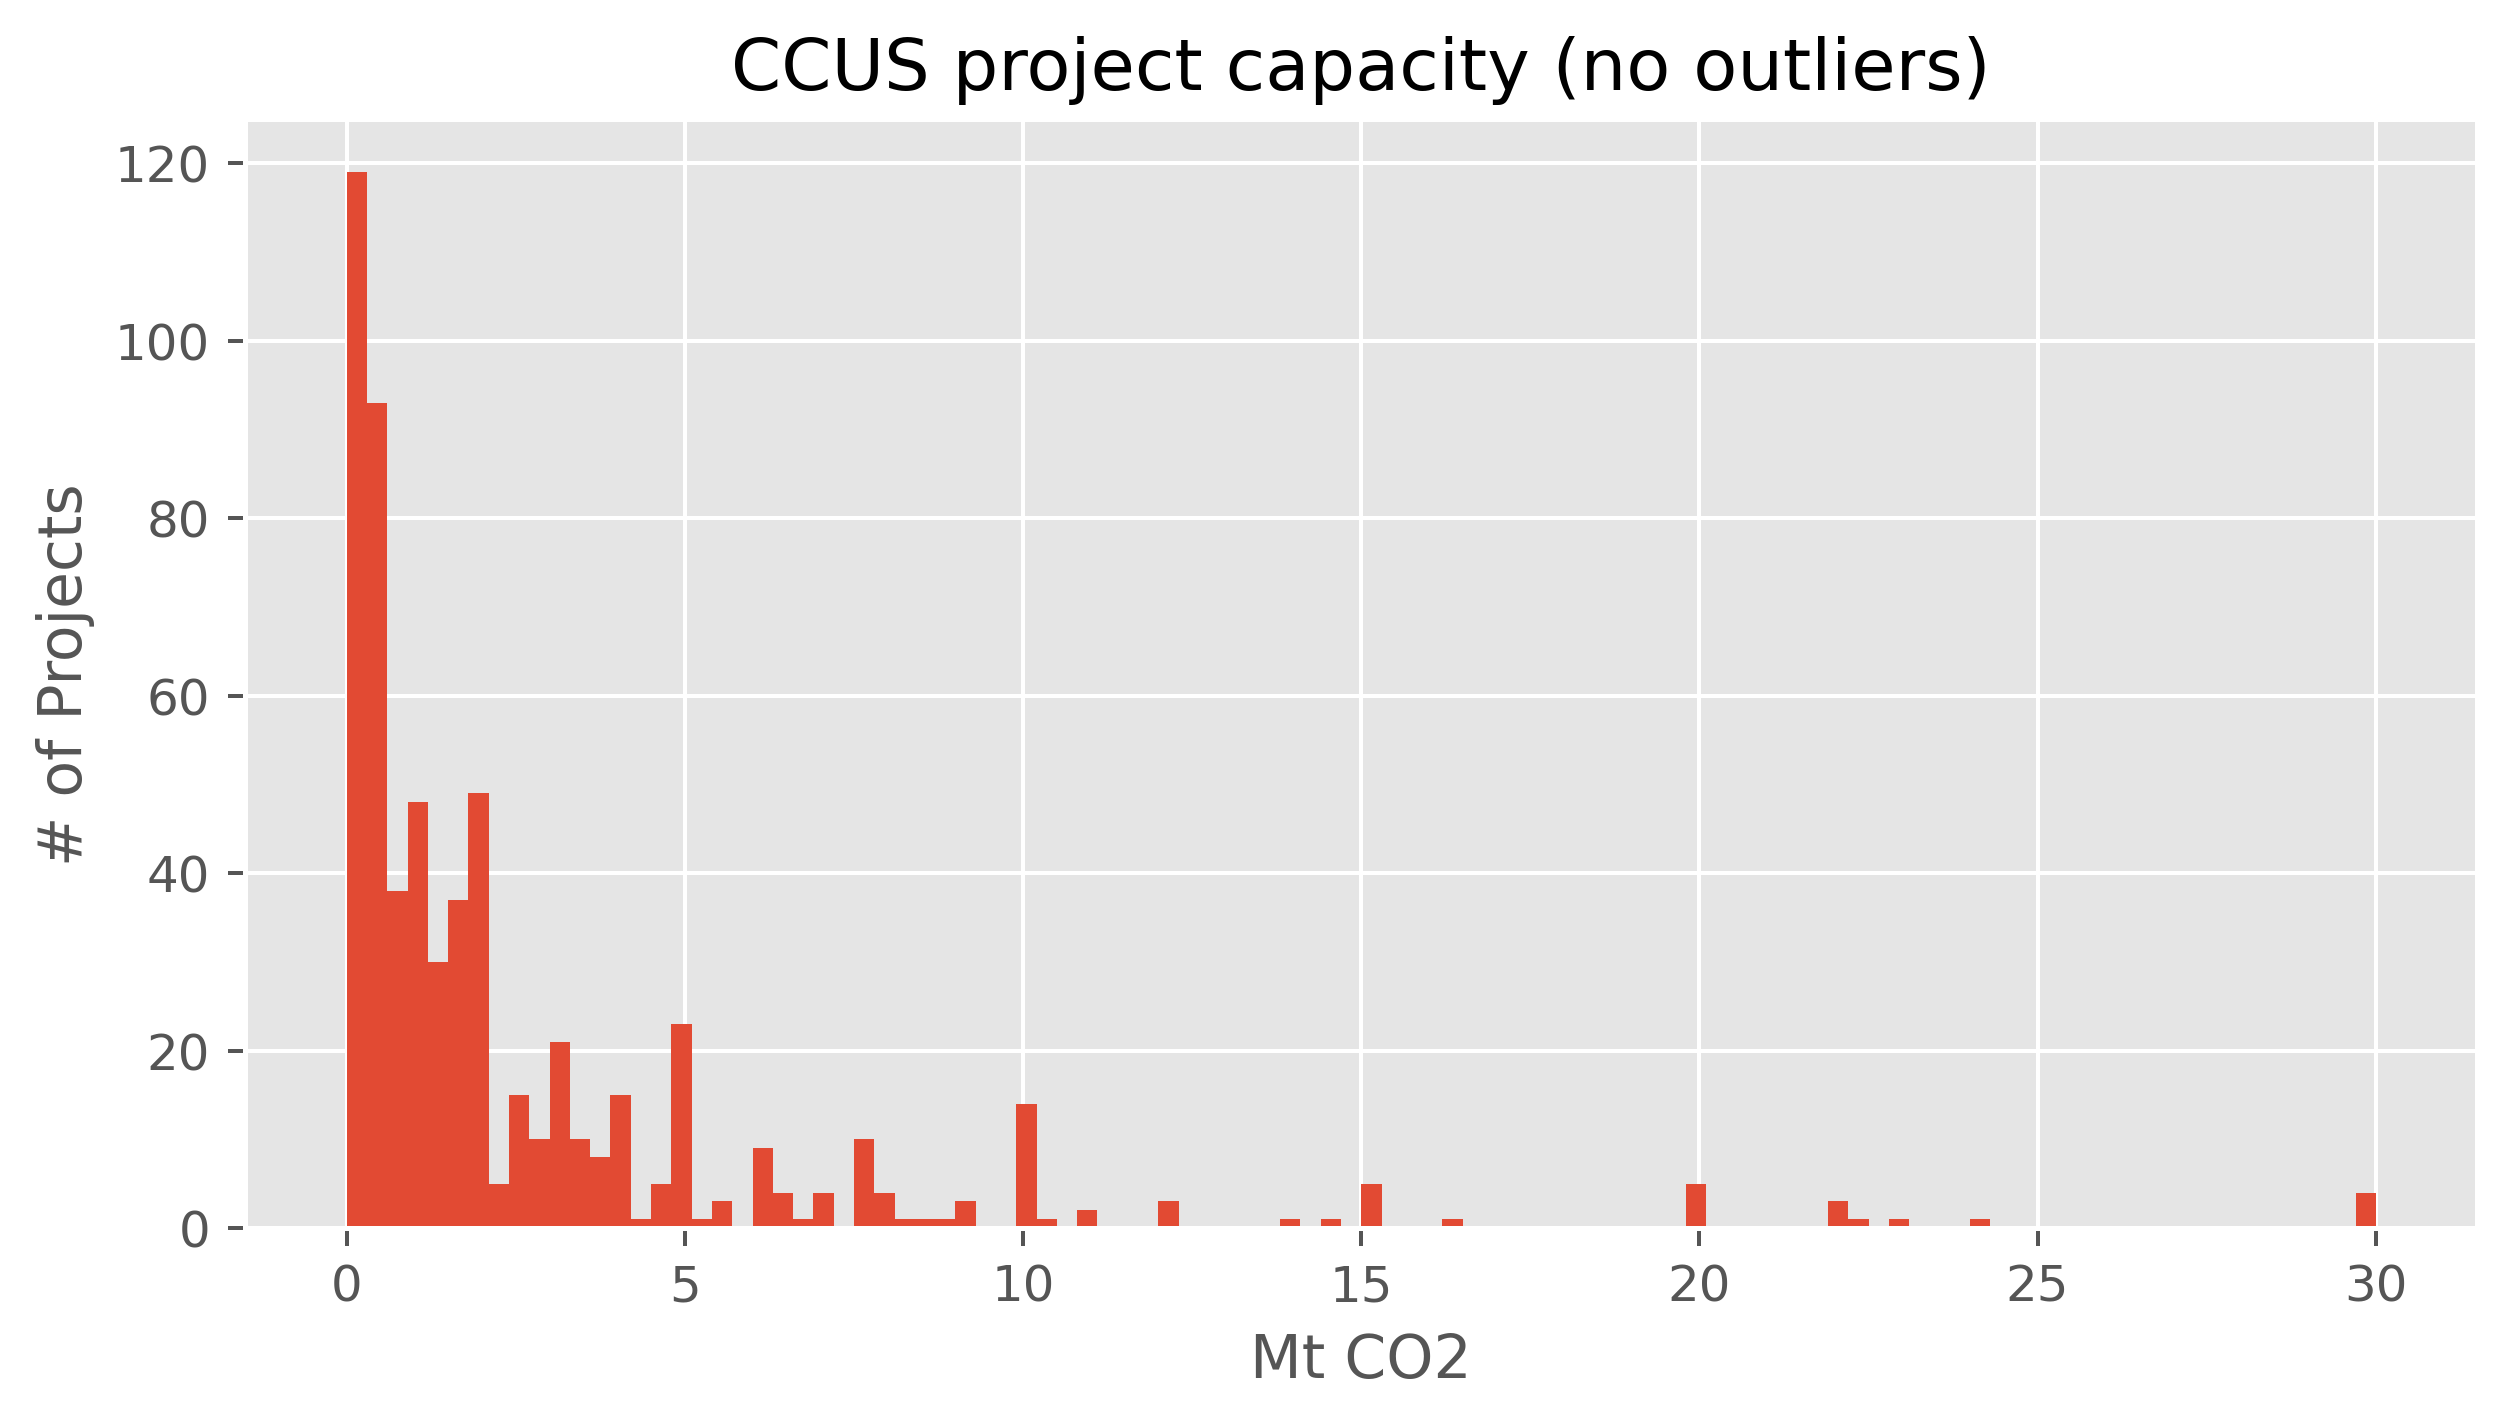

In [40]:
df_77["capacity_ann"].drop([635, 676]).hist(bins=100)
plt.xlabel("Mt CO2")
plt.ylabel("# of Projects")
plt.title("CCUS project capacity (no outliers)")

Text(0.5, 1.0, 'CCUS project estimated capacity (no outliers)')

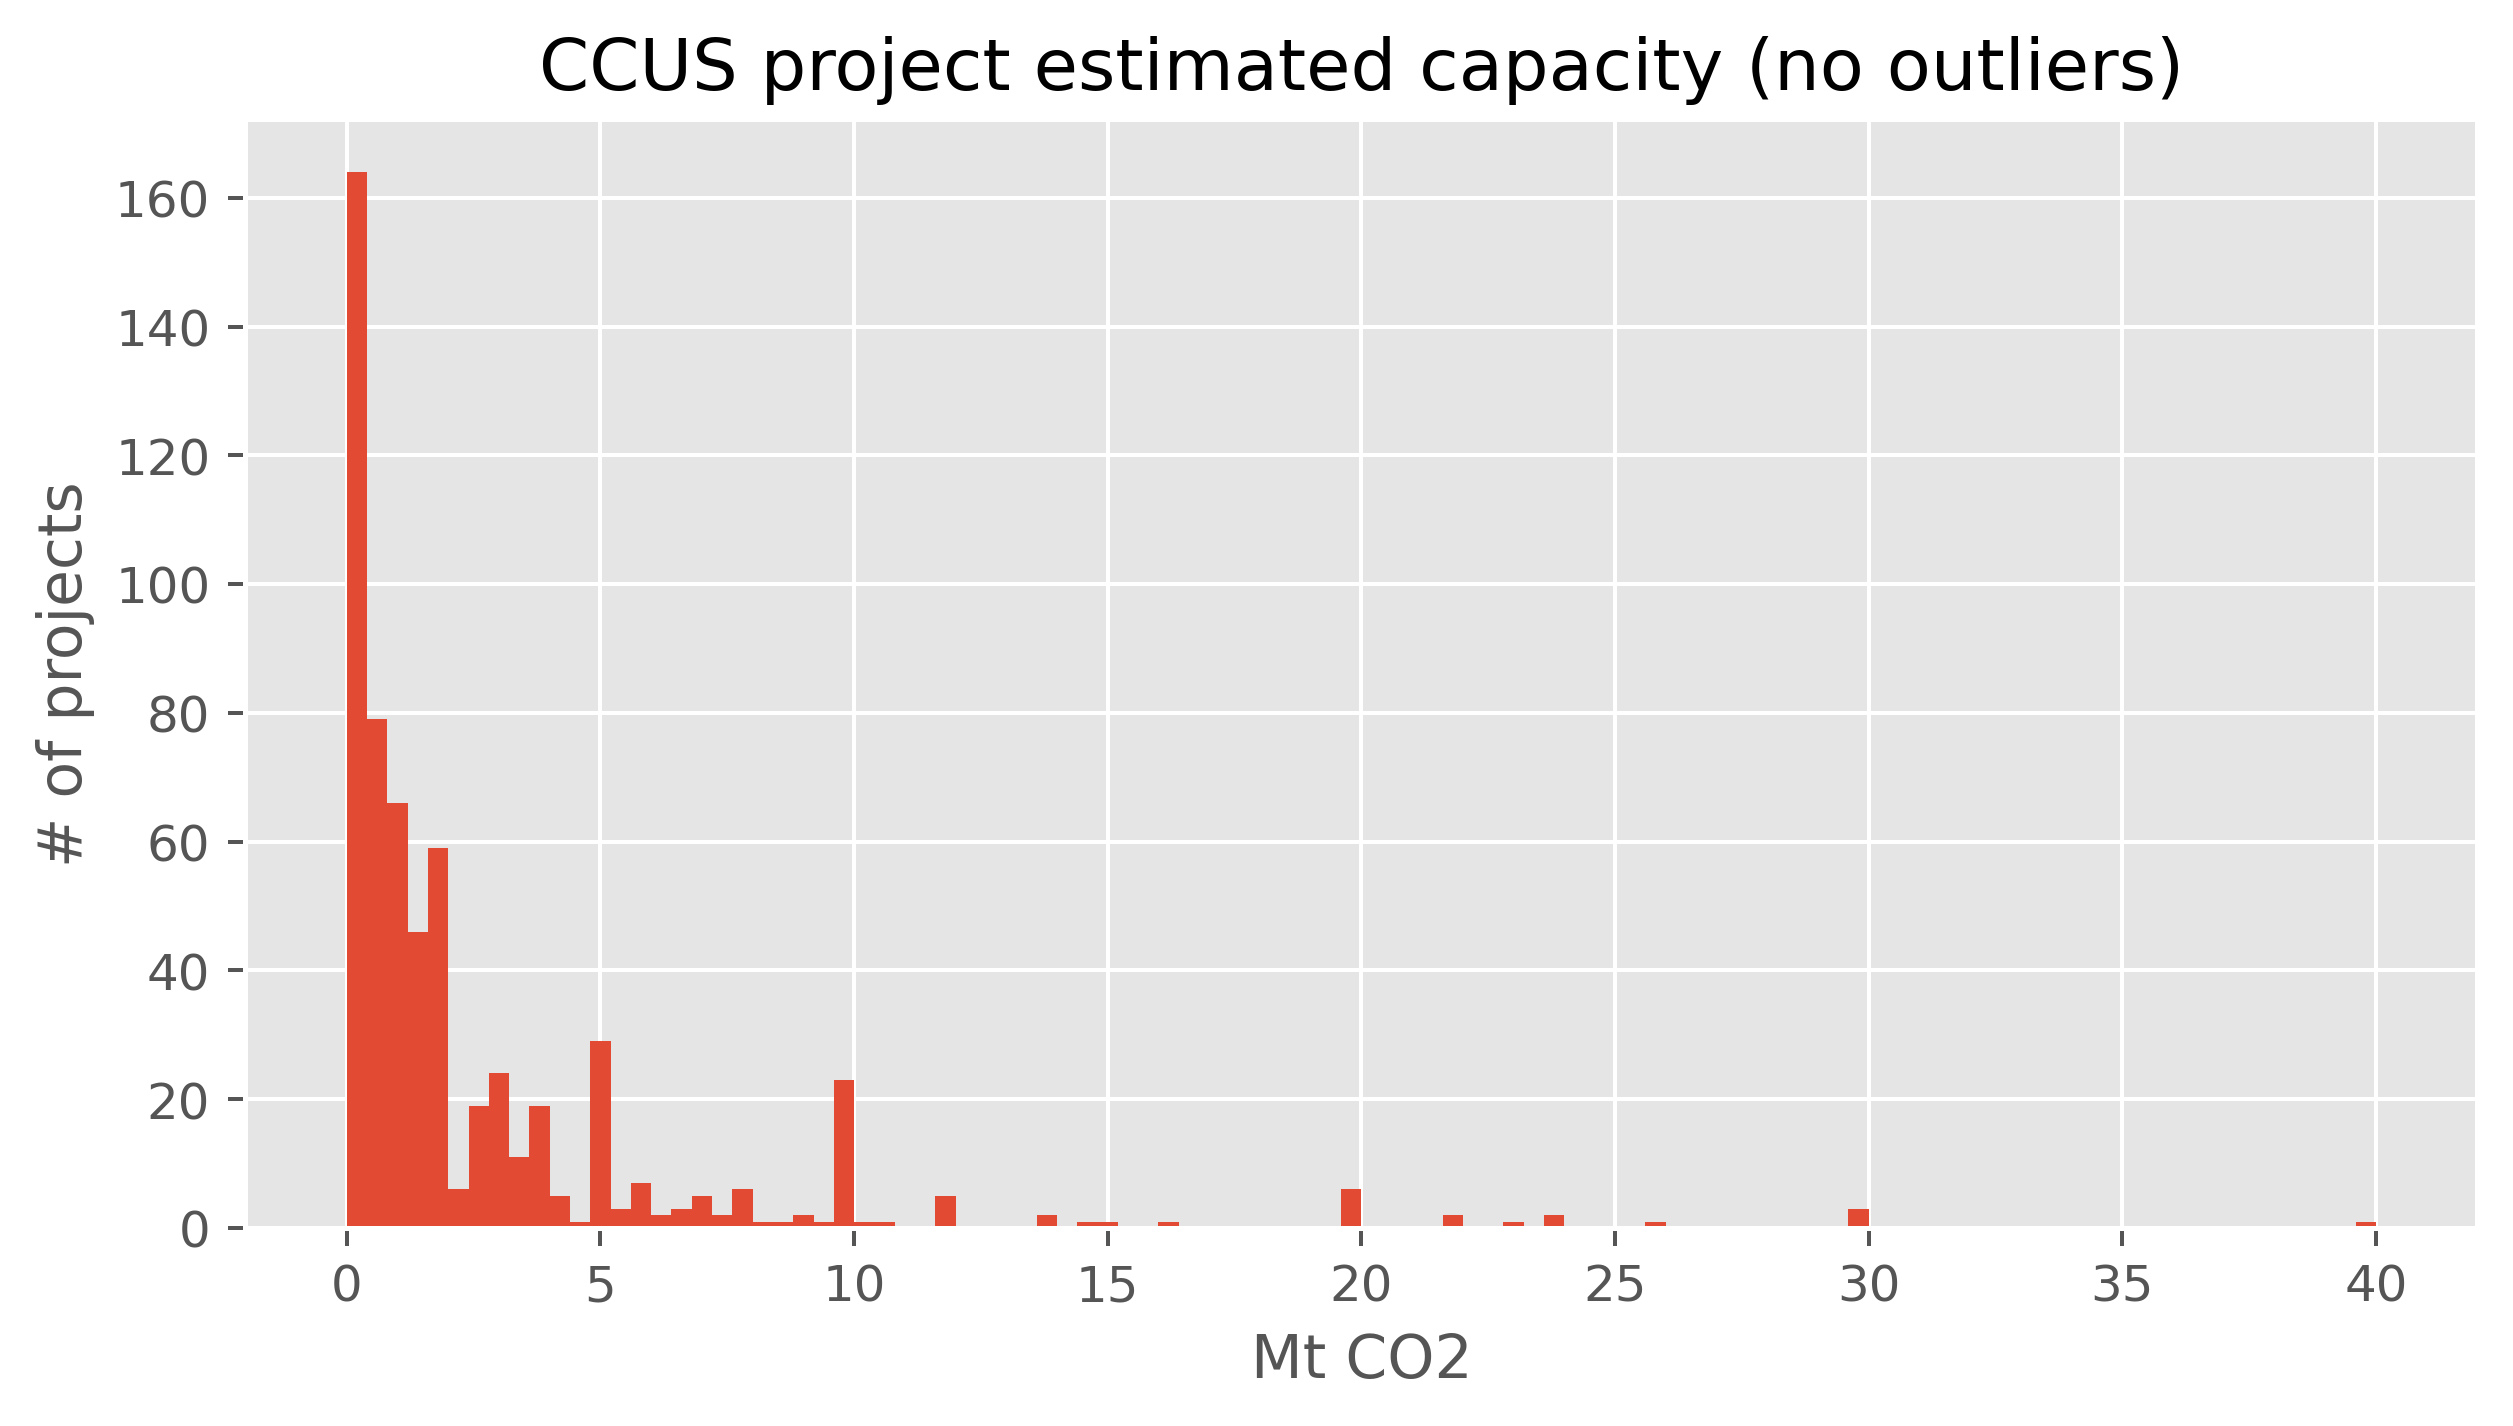

In [41]:
df_77["capacity_est"].drop([635, 676]).hist(bins=100)
plt.xlabel("Mt CO2")
plt.ylabel("# of projects")
plt.title("CCUS project estimated capacity (no outliers)")

Text(0.5, 1.0, 'Difference between announced and estimated CCUS project capacity')

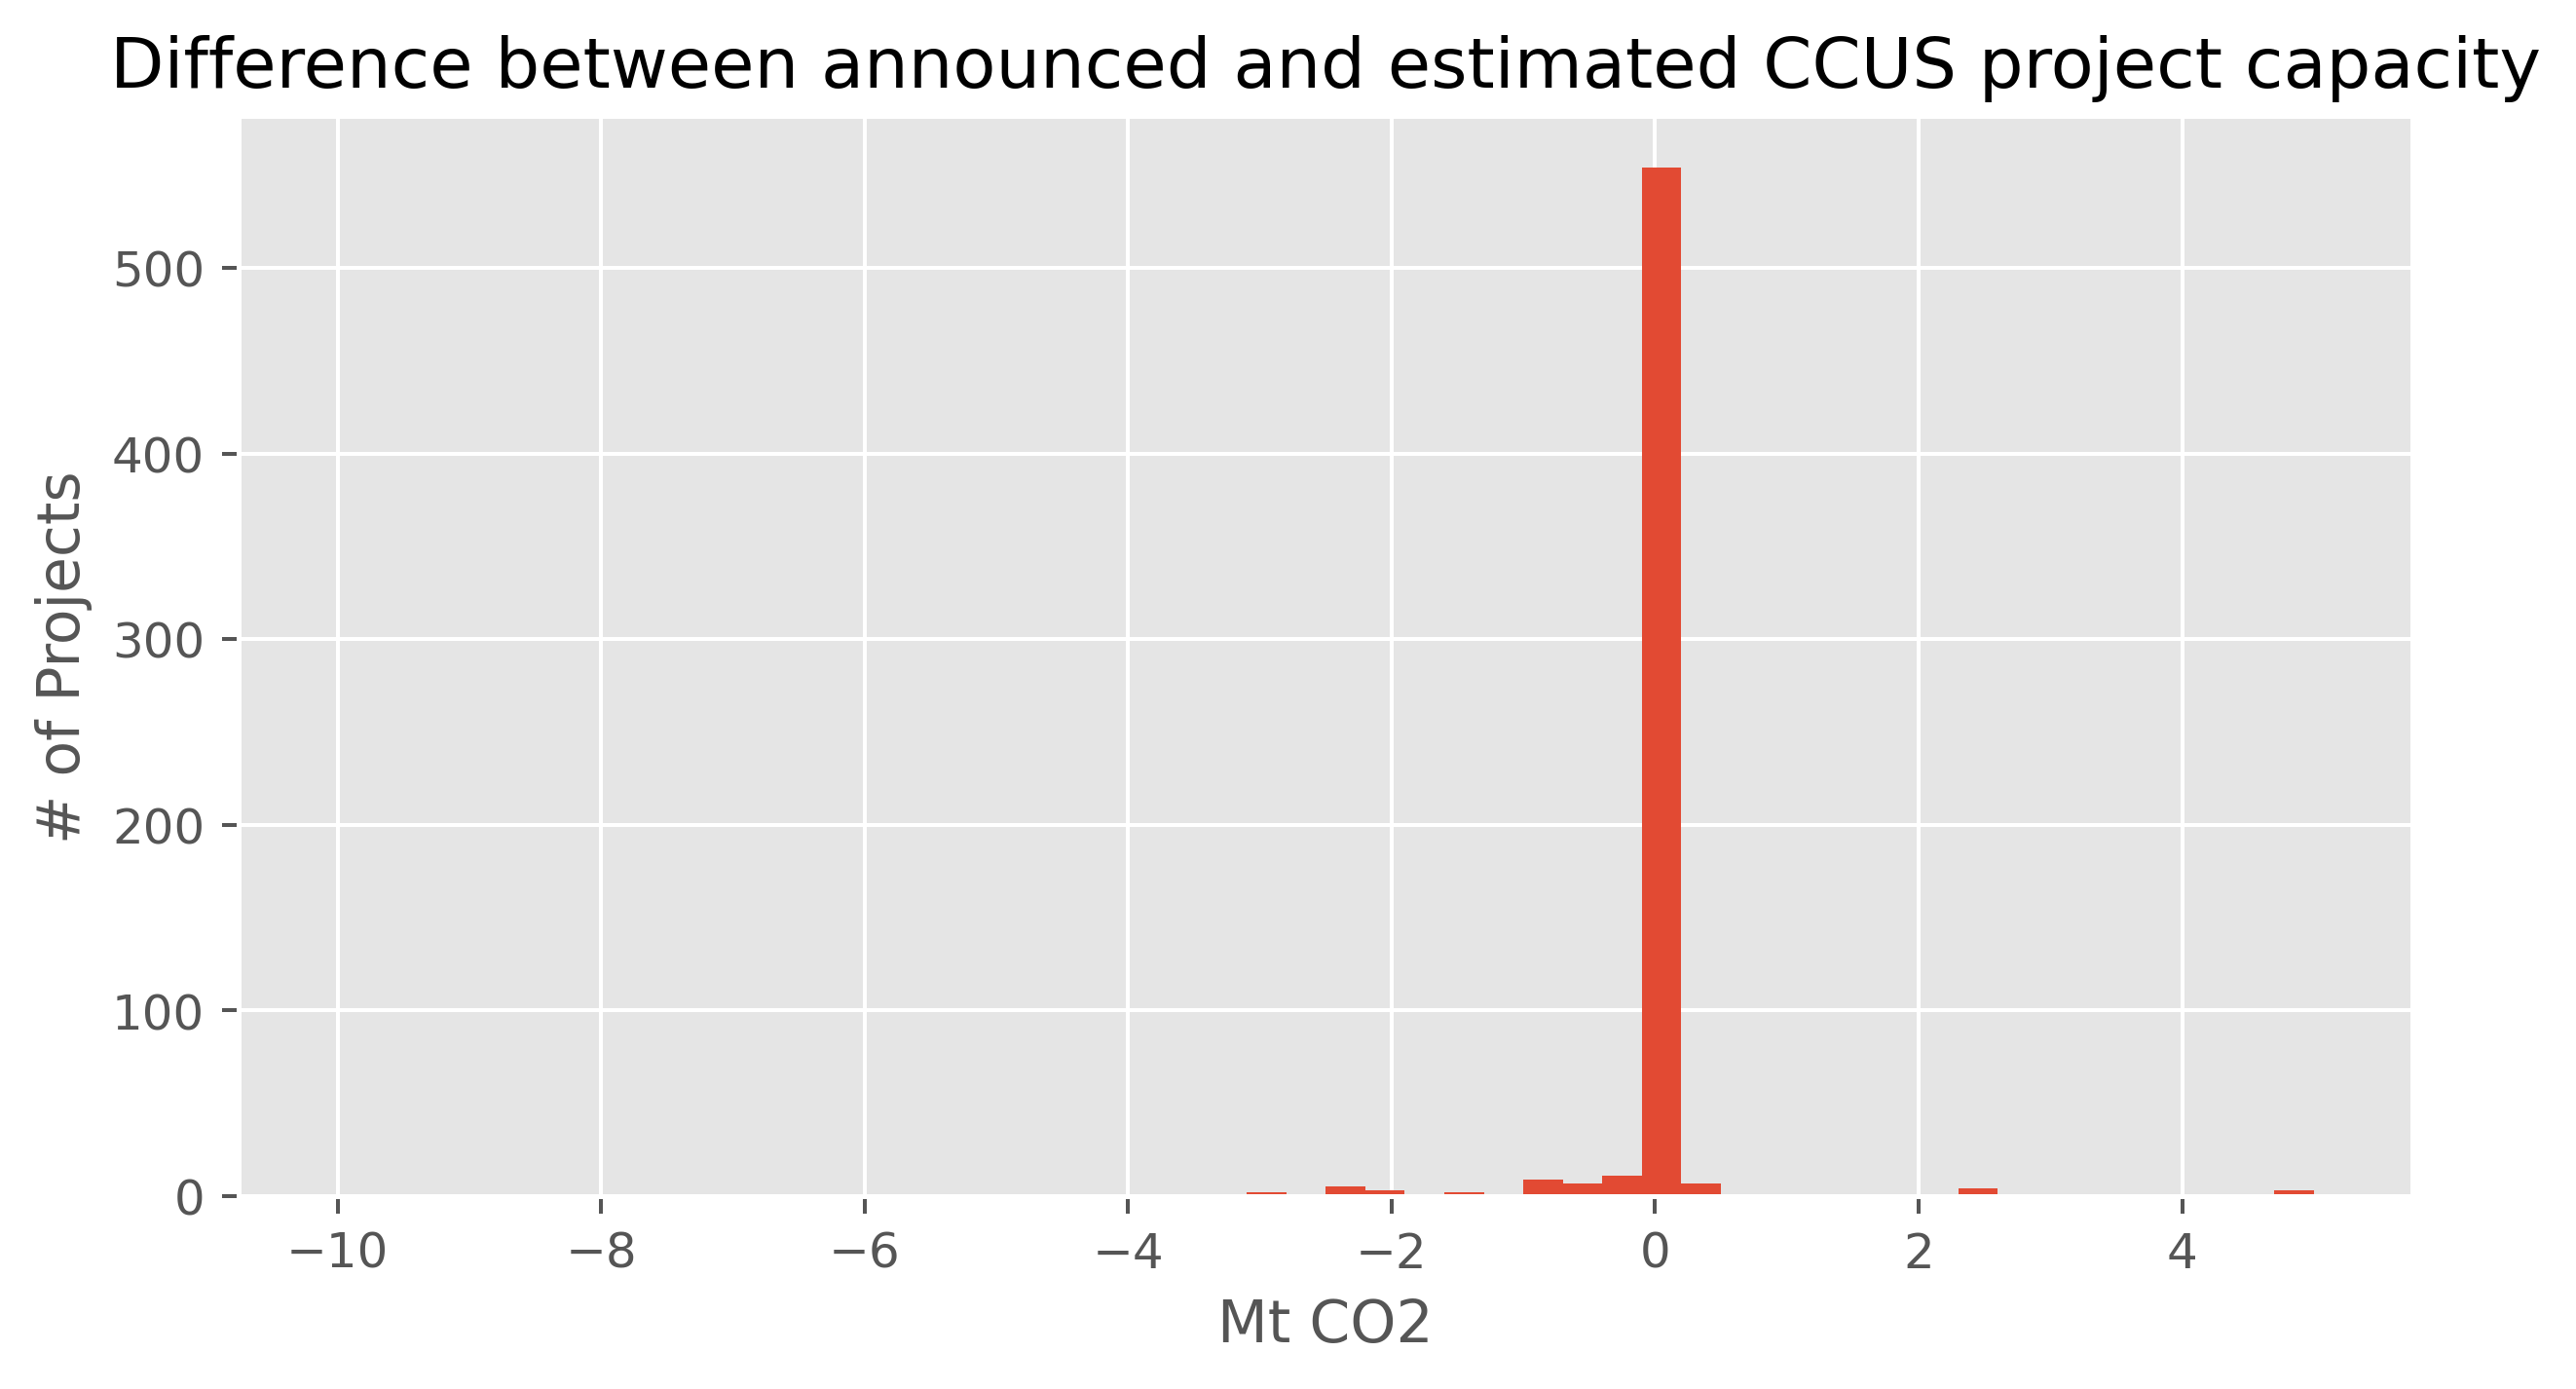

In [42]:
df_77["capacity_diff"].hist(bins=50)
plt.xlabel("Mt CO2")
plt.ylabel("# of Projects")
plt.title("Difference between announced and estimated CCUS project capacity")

### Insights

The data continues being mostly homogenous, with _70%_ of projects being announced in 2021-2023


### Outliers


Obs: I used df_77 instead of df here because the df_77 table returns more results than the whole table, which makes no sense.


In [43]:
df_77[df_77["status"] == "Suspended/cancelled/decommissioned"]

,name,status,region,country,sector,type,fate,year,capacity_ann,capacity_est,capacity_diff
433,Illinois Basin Decatur Project (IL),Suspended/cancelled/decommissioned,North America,United States,Biofuels,Full Chain,Dedicated storage,2009.0,0.33,0.33,0.0
437,In Salah,Suspended/cancelled/decommissioned,Africa,Algeria,Natural gas processing/LNG,Full Chain,Dedicated storage,NaN,0.50,0.50,0.0
462,Kemper county CCUS (MS),Suspended/cancelled/decommissioned,North America,United States,Power and heat,Full Chain,EOR,NaN,3.00,3.00,0.0


In [44]:
df_77[df_77["region"] == "Africa"]

,name,status,region,country,sector,type,fate,year,capacity_ann,capacity_est,capacity_diff
359,Great Carbon Valley DAC,Planned,Africa,Kenya,DAC,Full Chain,Dedicated storage,2023.0,1.000,1.000,0.0
437,In Salah,Suspended/cancelled/decommissioned,Africa,Algeria,Natural gas processing/LNG,Full Chain,Dedicated storage,NaN,0.500,0.500,0.0
663,Project Hummingbird,Planned,Africa,Kenya,DAC,Full Chain,Dedicated storage,NaN,0.001,0.001,0.0
749,Structure A&E,Planned,Africa,Lybia,Natural gas processing/LNG,Full Chain,Dedicated storage,2023.0,1.600,1.600,0.0


Here, we see that the oversized projects are both Transport projects, which explains their size in comparison to the other ones.


In [45]:
df_77[df_77["capacity_ann"] > 100]

,name,status,region,country,sector,type,fate,year,capacity_ann,capacity_est,capacity_diff
635,Port of Corpus Christi-Mississippi pipeline (TX),Planned,North America,United States,Transport,Transport,Unknown/unspecified,2023.0,250.0,250.0,0.0
676,Project WyoTCH pipeline (WY),Planned,North America,United States,Transport,Transport,Unknown/unspecified,2023.0,120.0,120.0,0.0


The two biggest non-transport projects are from the UK, which is somewhat unexpected.


In [46]:
# df_77["capacity_ann"].drop([635, 676]).sort_values(ascending=False).head(10)

df_77.drop([635, 676])[df_77["capacity_ann"] > 25]

/tmp/ipykernel_5846/2164995681.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_77.drop([635, 676])[df_77["capacity_ann"] > 25]


,name,status,region,country,sector,type,fate,year,capacity_ann,capacity_est,capacity_diff
319,Fluxys-Equinor Belgium-Norway Trunk Line,Planned,Europe,Belgium-Norway,Transport,Transport,Dedicated storage,2022.0,30.0,40.0,-10.0
563,North Sea CO2 corridor,Planned,Europe,Belgium-Germany,Transport,Transport,Dedicated storage,2023.0,30.0,30.0,0.0
773,The Bluestreak CO2 Joint Venture,Planned,Europe,United Kingdom,T&S,T&S,Dedicated storage,2023.0,30.0,30.0,0.0
794,UK Poseidon CCS project phase 2,Planned,Europe,United Kingdom,Storage,Storage,Dedicated storage,2023.0,30.0,30.0,0.0


Here we see the older projects are all full chain, which makes sense since there was no previous infrastructure to accomodate projects for a specific niche. They alse have much higher capacity than the median project in the data. This is talked about in the [commentary](https://www.iea.org/commentaries/how-new-business-models-are-boosting-momentum-on-ccus): "historically, oil and gas companies have been leaders in CCUS development". They are also for EOR (enhanced oil recovery) projects, which means they are not necessarily interested in reducing carbon emissions per se. They are also all still operational.


In [47]:
df_77[df_77["year"] < 2000]

,name,status,region,country,sector,type,fate,year,capacity_ann,capacity_est,capacity_diff
294,Enid fertiliser (OK),Operational,North America,United States,Chemicals,Full Chain,EOR,1982.0,0.68,0.68,0.0
360,Great Plains Synfuel Plant (ND) Weyburn-Midale...,Operational,North America,United States,Other fuel transformation,Full Chain,EOR,1997.0,3.00,3.00,0.0
476,Labarge Shute Creek Gas Processing Plant origi...,Operational,North America,United States,Natural gas processing/LNG,Full Chain,EOR,1984.0,3.50,3.50,0.0
735,Sleipner,Operational,Europe,Norway,Natural gas processing/LNG,Full Chain,Dedicated storage,1991.0,1.00,1.00,0.0


## Key insights


-   Interesting projects might include
    -   [Bluestreak](https://www.bumiarmada.com/bumi-armada-navigator-gas-and-bluestreak-co2-announce-memorandum-of-understanding-with-uniper-for-joint-study-on-export-of-co2-emissions-from-proposed-uk-carbon-capture-plant/)
    -   [Poseidon](https://perenco-ccs.com/the-poseidon-project/)
    -   [Sleipner](https://sequestration.mit.edu/tools/projects/sleipner.html)


## Numerical data


In [48]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

df_n = df_77.drop([635, 676])  # drop outliers

Since both capacity measures have 98% correlation, we can use either for the plots


In [49]:
df_n[["capacity_ann", "capacity_est"]].corr()

,capacity_ann,capacity_est
capacity_ann,1.000000,0.987177
capacity_est,0.987177,1.000000


Text(0.5, 1.0, 'Project capacity by year')

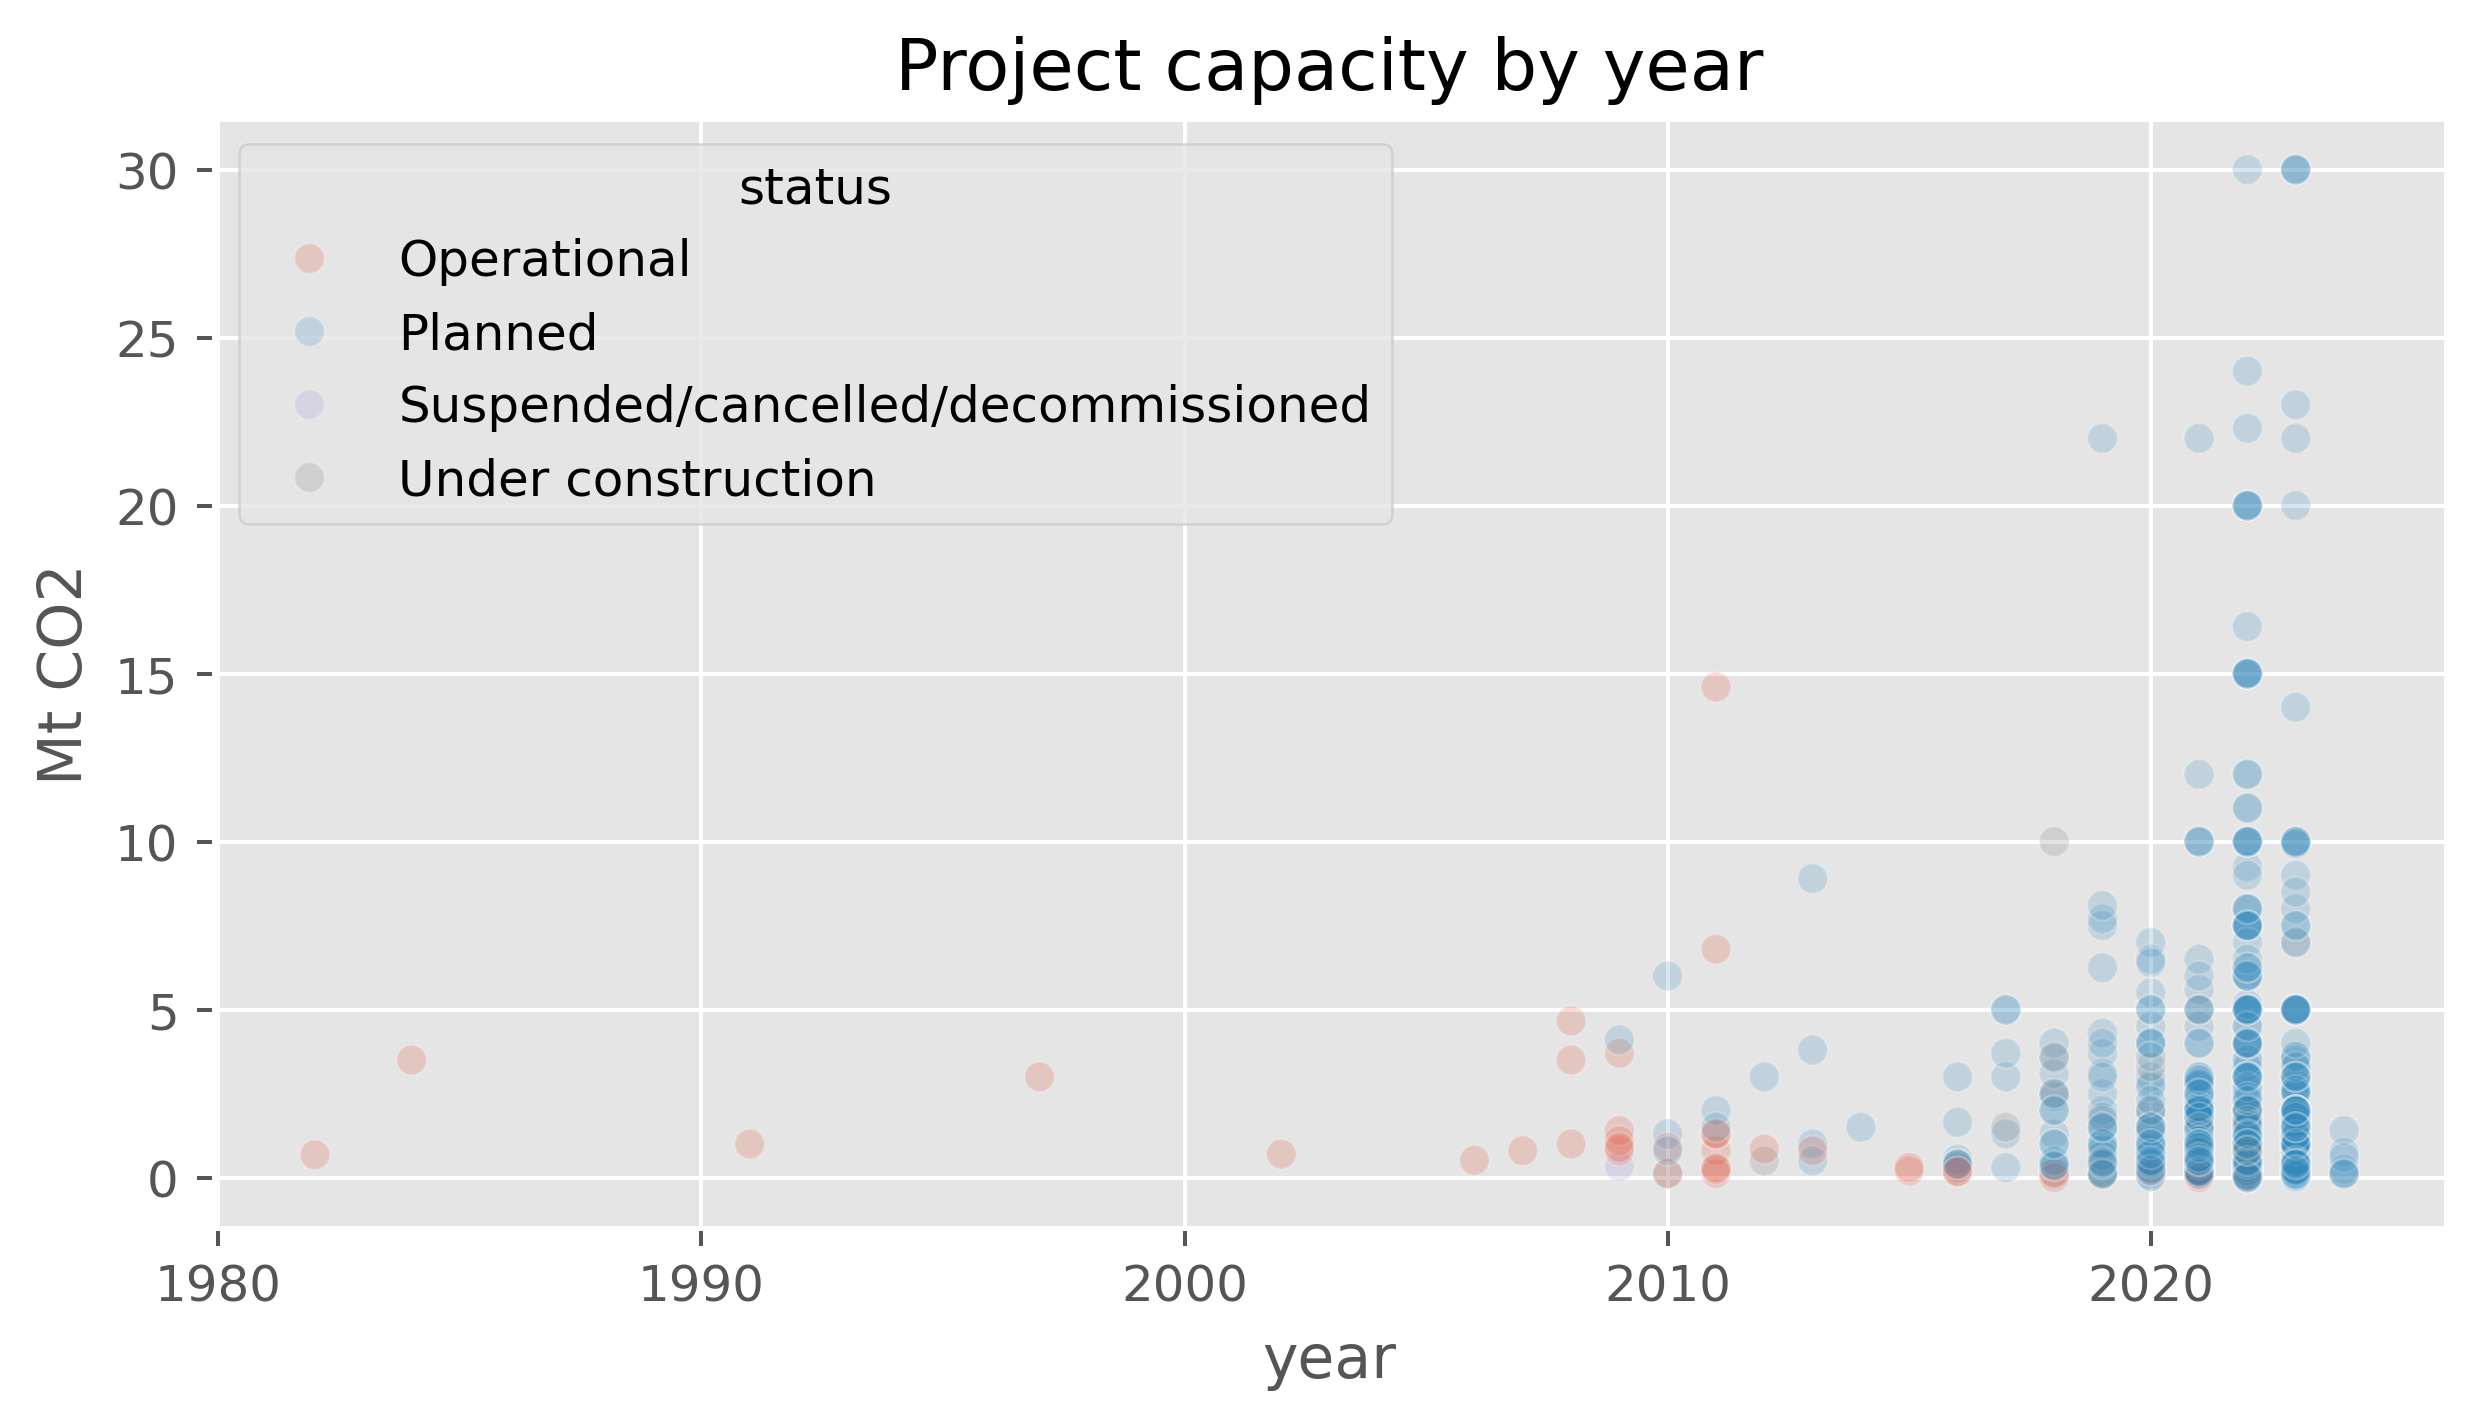

In [ ]:
sns.scatterplot(
    x="year",
    y="capacity_ann",
    data=df_n,
    alpha=0.2,
    hue="status",
)
plt.ylabel("Mt CO2")
plt.title("Project capacity by year");

This plot shows the concentration of projects after 2020 and how most of them are in the planned category


### Status x Capacity


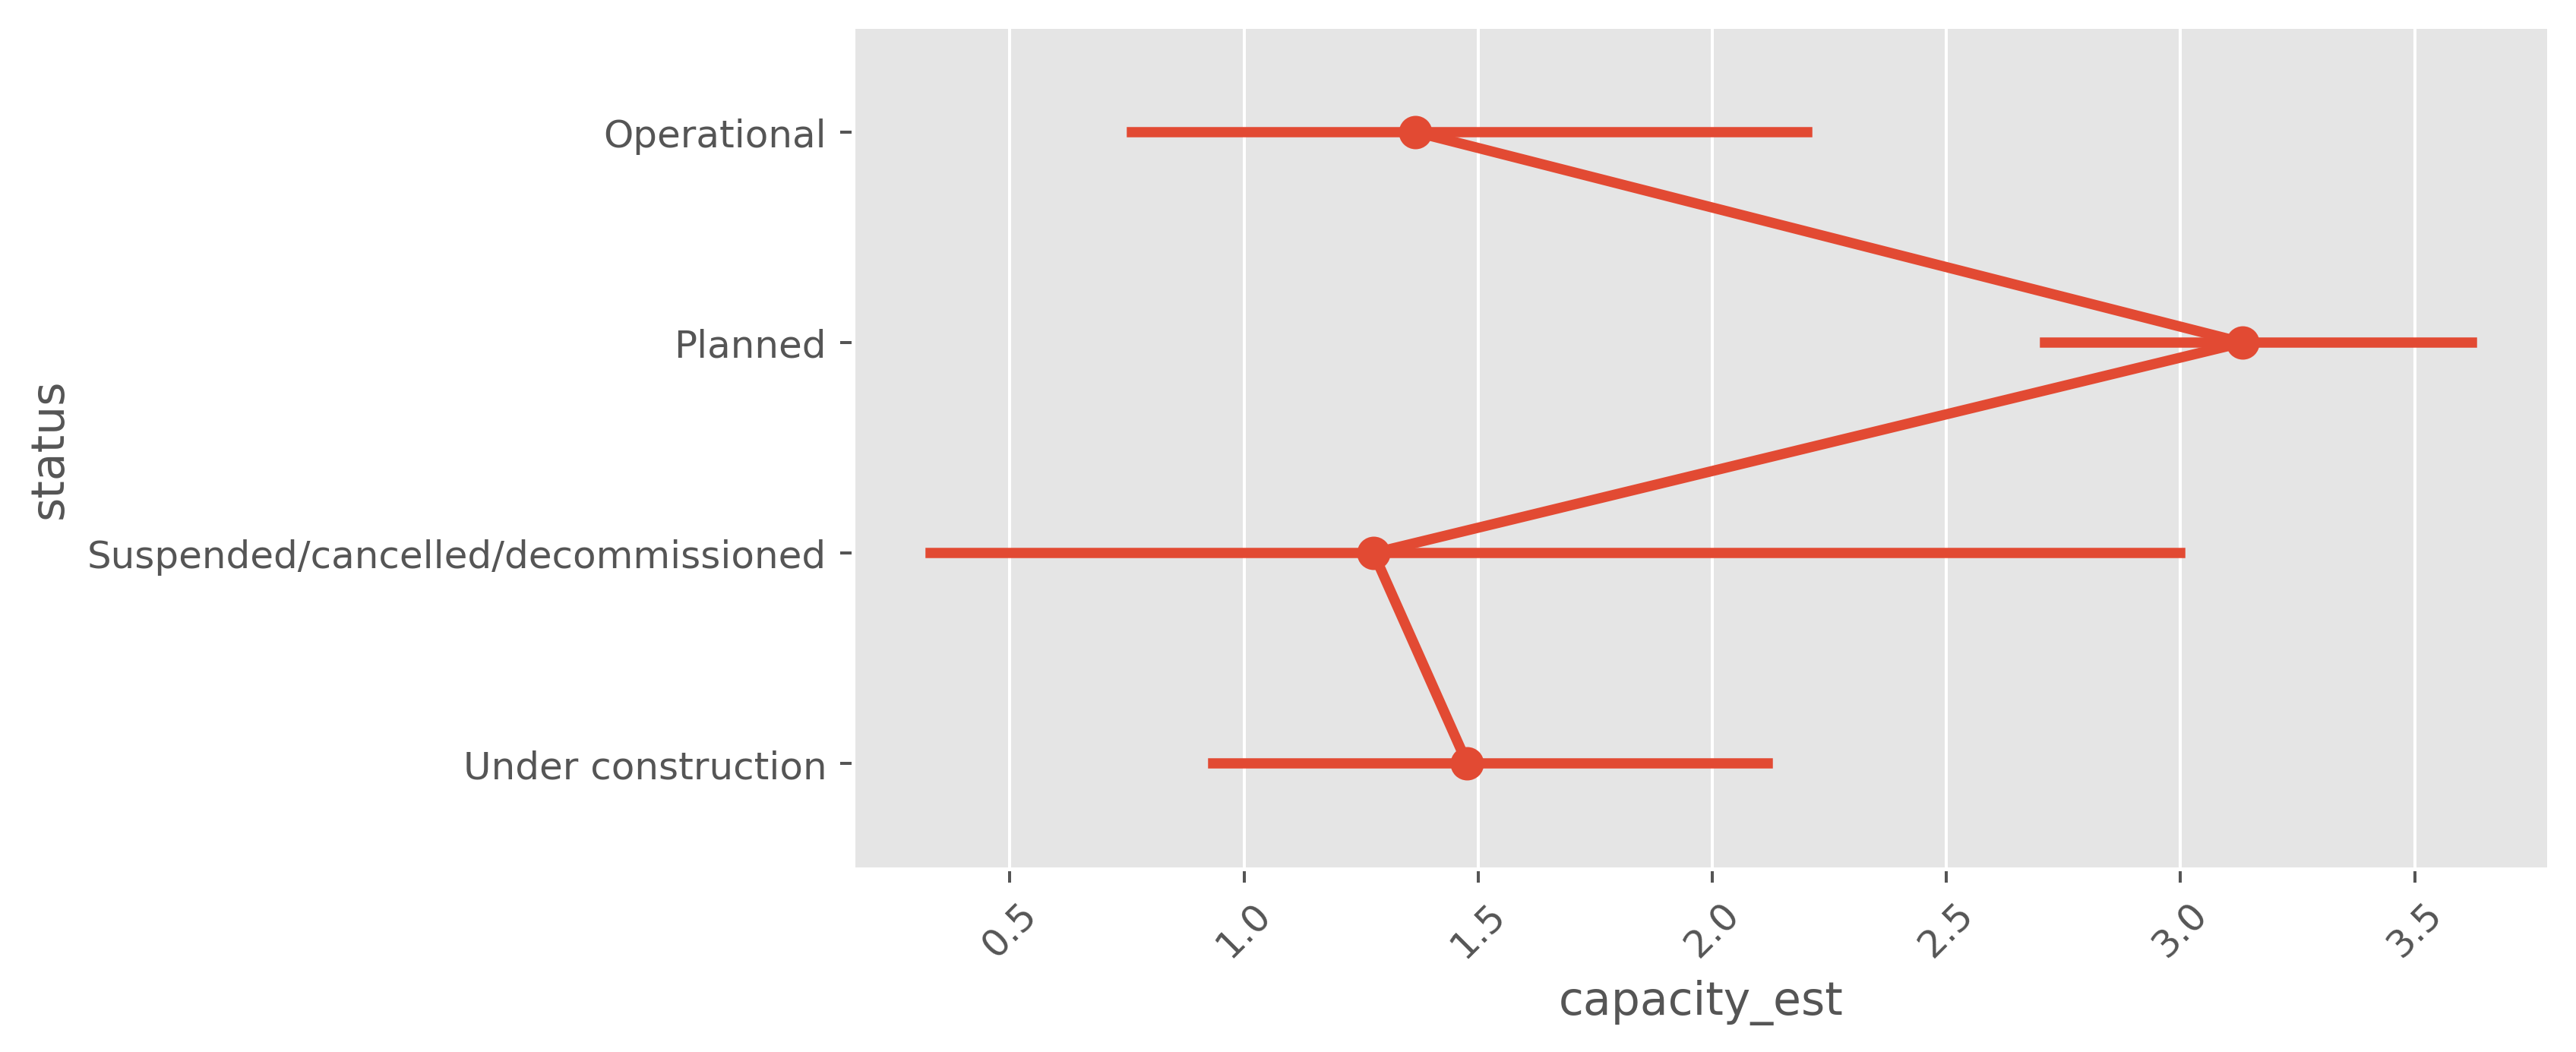

In [51]:
iv = "status"
dv = "capacity_est"

sns.pointplot(x=dv, y=iv, data=df_n)
plt.xticks(rotation=45);

In [52]:
# aov = smf.ols(f"{dv} ~ {iv}", data=df_n).fit()
# aov.summary()

In [53]:
df_n["capacity_ann"][df_n["status"] == "Planned"].describe()

count    517.000000
mean       3.060191
std        4.679400
min        0.000000
25%        0.425000
50%        1.400000
75%        3.550000
max       30.000000
Name: capacity_ann, dtype: float64

In [54]:
df_n["capacity_ann"][df_n["status"] != "Planned"].describe()

count    95.000000
mean      1.360074
std       2.149928
min       0.001000
25%       0.225000
50%       0.515000
75%       1.500000
max      14.600000
Name: capacity_ann, dtype: float64

-   Planned: mean 3.0 and std 4.6
-   Others: mean 1.4 and std 2.5

Sounds like the projects will, on average, double their capacity to capture carbon. This might reflect better tech, more interest or something else.

Let's test if this difference is statistically significant.


### Null hypothesis significance test

H<sub>0</sub>: mean<sub>planned</sub> - mean<sub>other</sub> = 0

H<sub>A</sub>: mean<sub>planned</sub> - mean<sub>other</sub> =/= 0

In [55]:
import statsmodels.stats.weightstats as st

series_a = df_n["capacity_ann"][df_n["status"] == "Planned"]
series_b = df_n["capacity_ann"][df_n["status"] != "Planned"]

cm = st.CompareMeans(
    st.DescrStatsW(series_a),
    st.DescrStatsW(series_b),
)

In [56]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,1.7001,0.490,3.473,0.001,0.739,2.662


In [57]:
_, p, _ = cm.ttest_ind()
confint_low, confint_high = cm.tconfint_diff()
print(f"CI [{confint_low:.2f}, {confint_high:.2f}]")
print(f"p = {p:.3f}")

CI [0.74, 2.66]
p = 0.001


Since:

-   the confidence interval does not cross zero and
-   the p value is less than 0.05,

we can say that the difference between these means is statistically significant.

Thus, we **reject the null hypothesis** that there is no difference between the means of the CCUS projects that are planned and the ones which are already operational, under construction or decomissioned.

Of course, the IEA says that these are all the large-scale CCUS projects that exist, which means that we are working not with a sample, but the whole population. If that is the case, no statistical test is necessary -- the means are simply different. But if we don't believe they can track every single project (and they have left many out for a variety of reasons), doing this analysis might be prudent either way.


In [58]:
# sns.pointplot(x="type", y="capacity_ann", data=df_n)
# plt.xticks(rotation=45);

## Conclusion


This project showcases data cleaning, feature engineering, descriptive statistics and inferential statistics. It also confers some insights to someone who might be interested in joining the CCUS market.

-   **80%+** CCUS projects are based in Europe and North America
-   **85%+** CCUS projects are in the planning stage.
-   There are more projects planning on capturing the carbon for storage than there are storage projects.
- Projects being planned today have higher capacity than projects that are operational or being built. 
